### **Set Up**

import the libraries

In [1]:
import numpy as np        #for data analysis
import pandas as pd       #for data manuplation 
import matplotlib.pyplot as plt     #for data visualization and analysis
import seaborn as sns

In [3]:
from pathlib import Path                #for directory and path
import sys                              #to use system path with pathlib
project_dir = Path.cwd().parent
sys.path.append(str(project_dir))

#for load reusable function from other folder
import importlib
import src.Fraud_detection as prep

Coloring

In [5]:
Red = "\033[31m"
Green = "\033[32m"
Orange = "\033[33m"
Blue = "\033[34m"
Yellow = "\033[33m"
Cyan = "\033[36m"
Reset = "\033[0m"

Load the dataset

In [6]:
path = project_dir / "data"
data_df = prep.lead_data(path / "creditcard.csv")

### **Exploratory Data Analysis(EDA)**

<font color="greenyellow">To understand the dataset</font>

**Statistical analysis**

In [7]:
frauded_df = data_df[data_df["Class"]==1]
legitmate_df = data_df[data_df["Class"]==0]

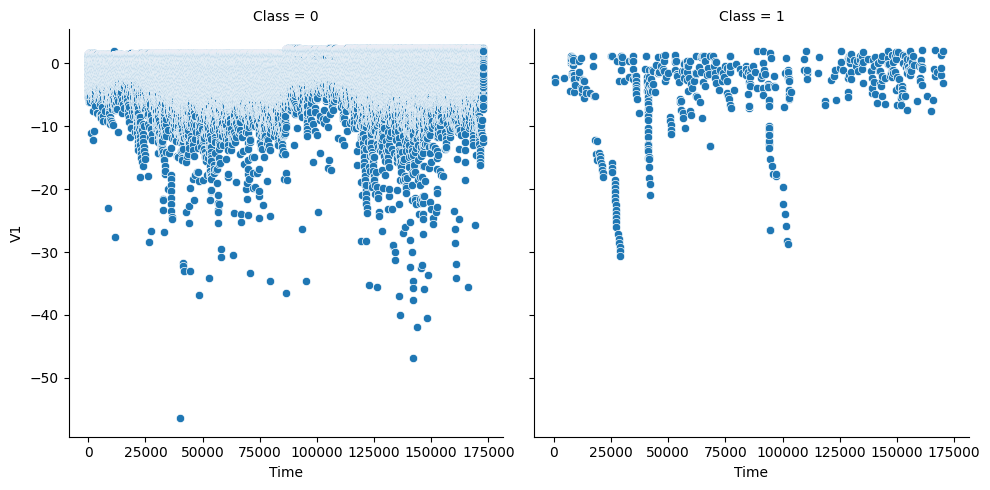

In [10]:

sns.relplot(x='Time', y='V1', col='Class', kind='scatter', data=data_df)

/home/nigatie/Documents/ML_DL/Machine_Learning/.VE_ML/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


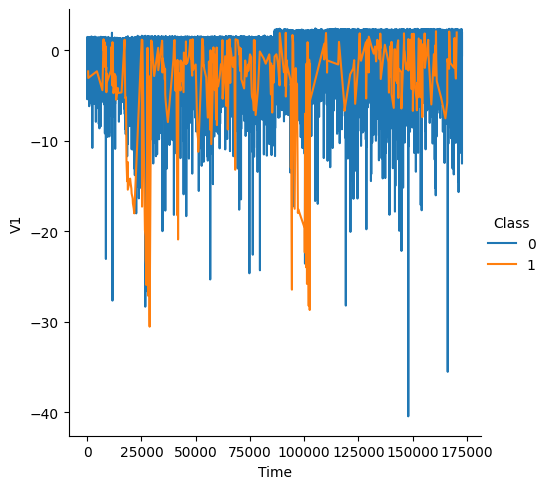

In [67]:
# Use existing columns for Class-wise plot
df_long = data_df[['Time', 'V1', 'Class']].copy()
df_long['Class'] = df_long['Class'].astype(str)

sns.relplot(data=df_long, x='Time', y='V1', hue='Class', kind='line', estimator='mean', ci=None)

In [28]:
statical_group1 = data_df.describe().iloc[:, :10]
statical_group2 = data_df.describe().iloc[:, 10:21]
statical_group3 =data_df.describe().iloc[:, 21:]
display(statical_group3)

,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Statistical summary visuals**
- Heatmap for quick comparison across statistics
- Boxplots for distribution and outliers (same columns as summary)

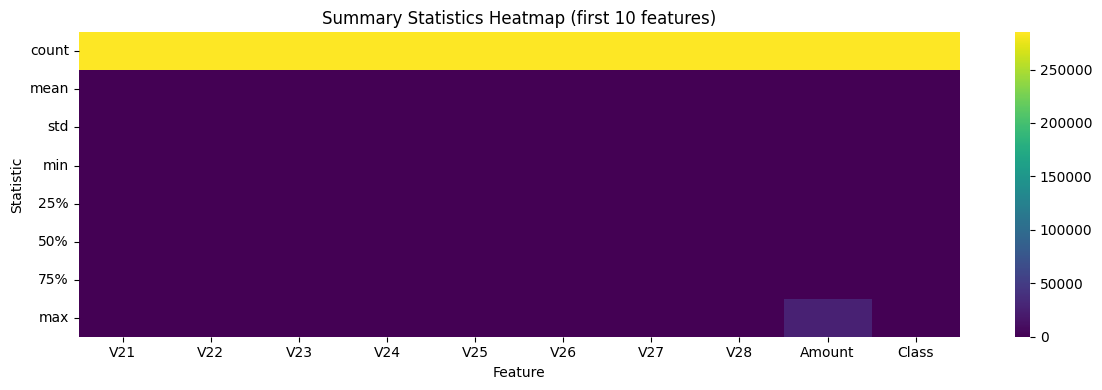

In [32]:
# Heatmap of describe() output
plt.figure(figsize=(12, 4))
sns.heatmap(statical_group3, annot=False, cmap="viridis", cbar=True)
plt.title("Summary Statistics Heatmap (first 10 features)")
plt.ylabel("Statistic")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

# # Boxplots for the same columns
# cols = statical_group2.columns.tolist()
# plt.figure(figsize=(12, 5))
# sns.boxplot(data=data_df[cols], orient="h")
# plt.title("Boxplots for First 10 Features")
# plt.tight_layout()
# plt.show()

**Distribution of the data**

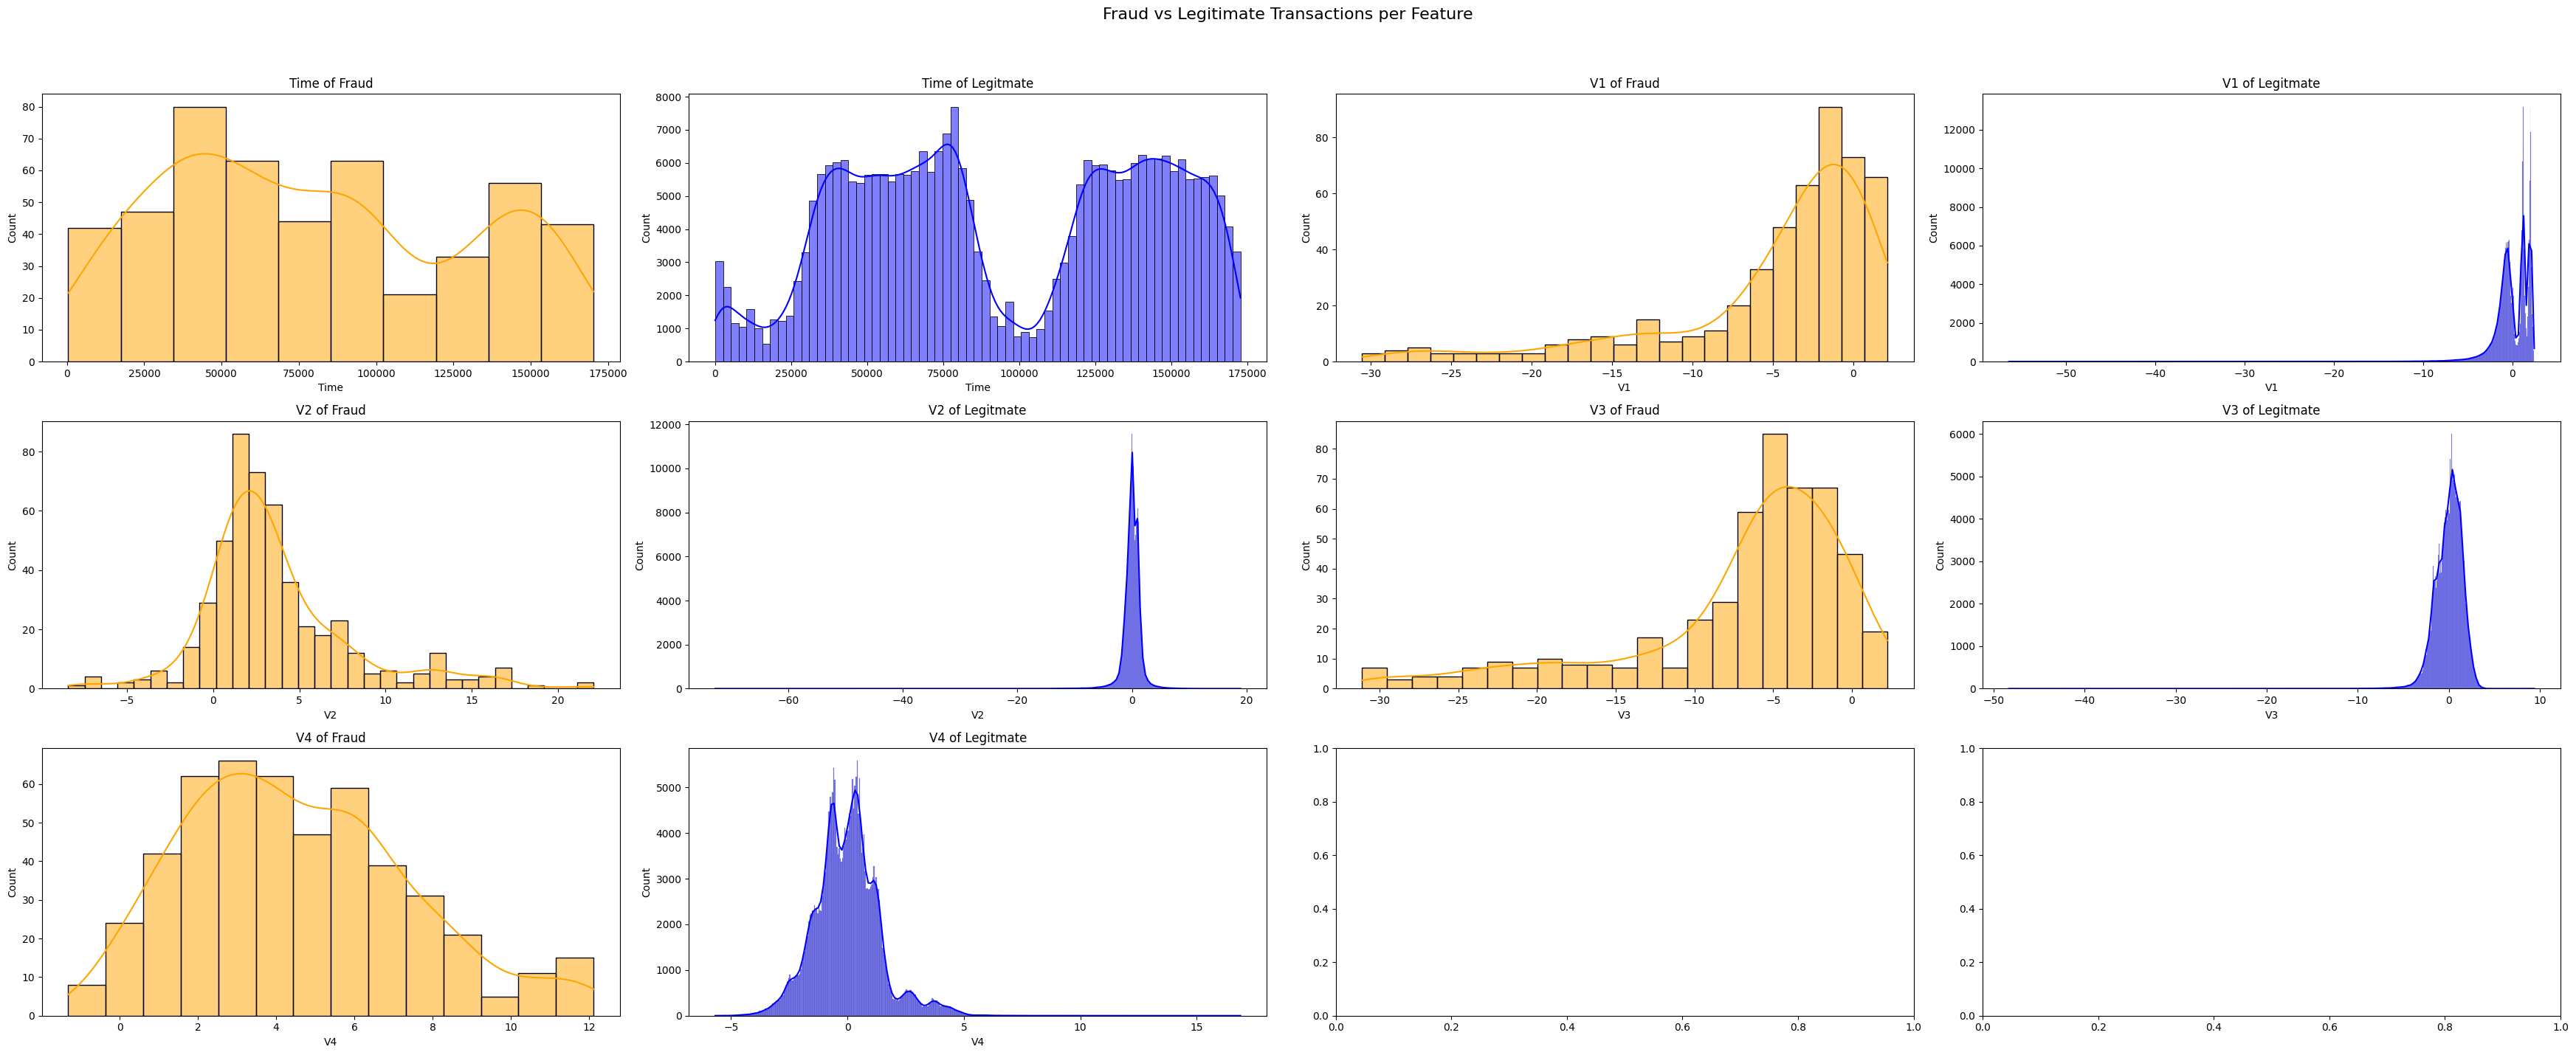

In [14]:
prep = importlib.reload(prep)
group1 = ["Time", "V1", "V2", "V3","V4"]
prep.sub_plot(frauded_df[group1], legitmate_df[group1], 3, 4, 35, 15, group1)

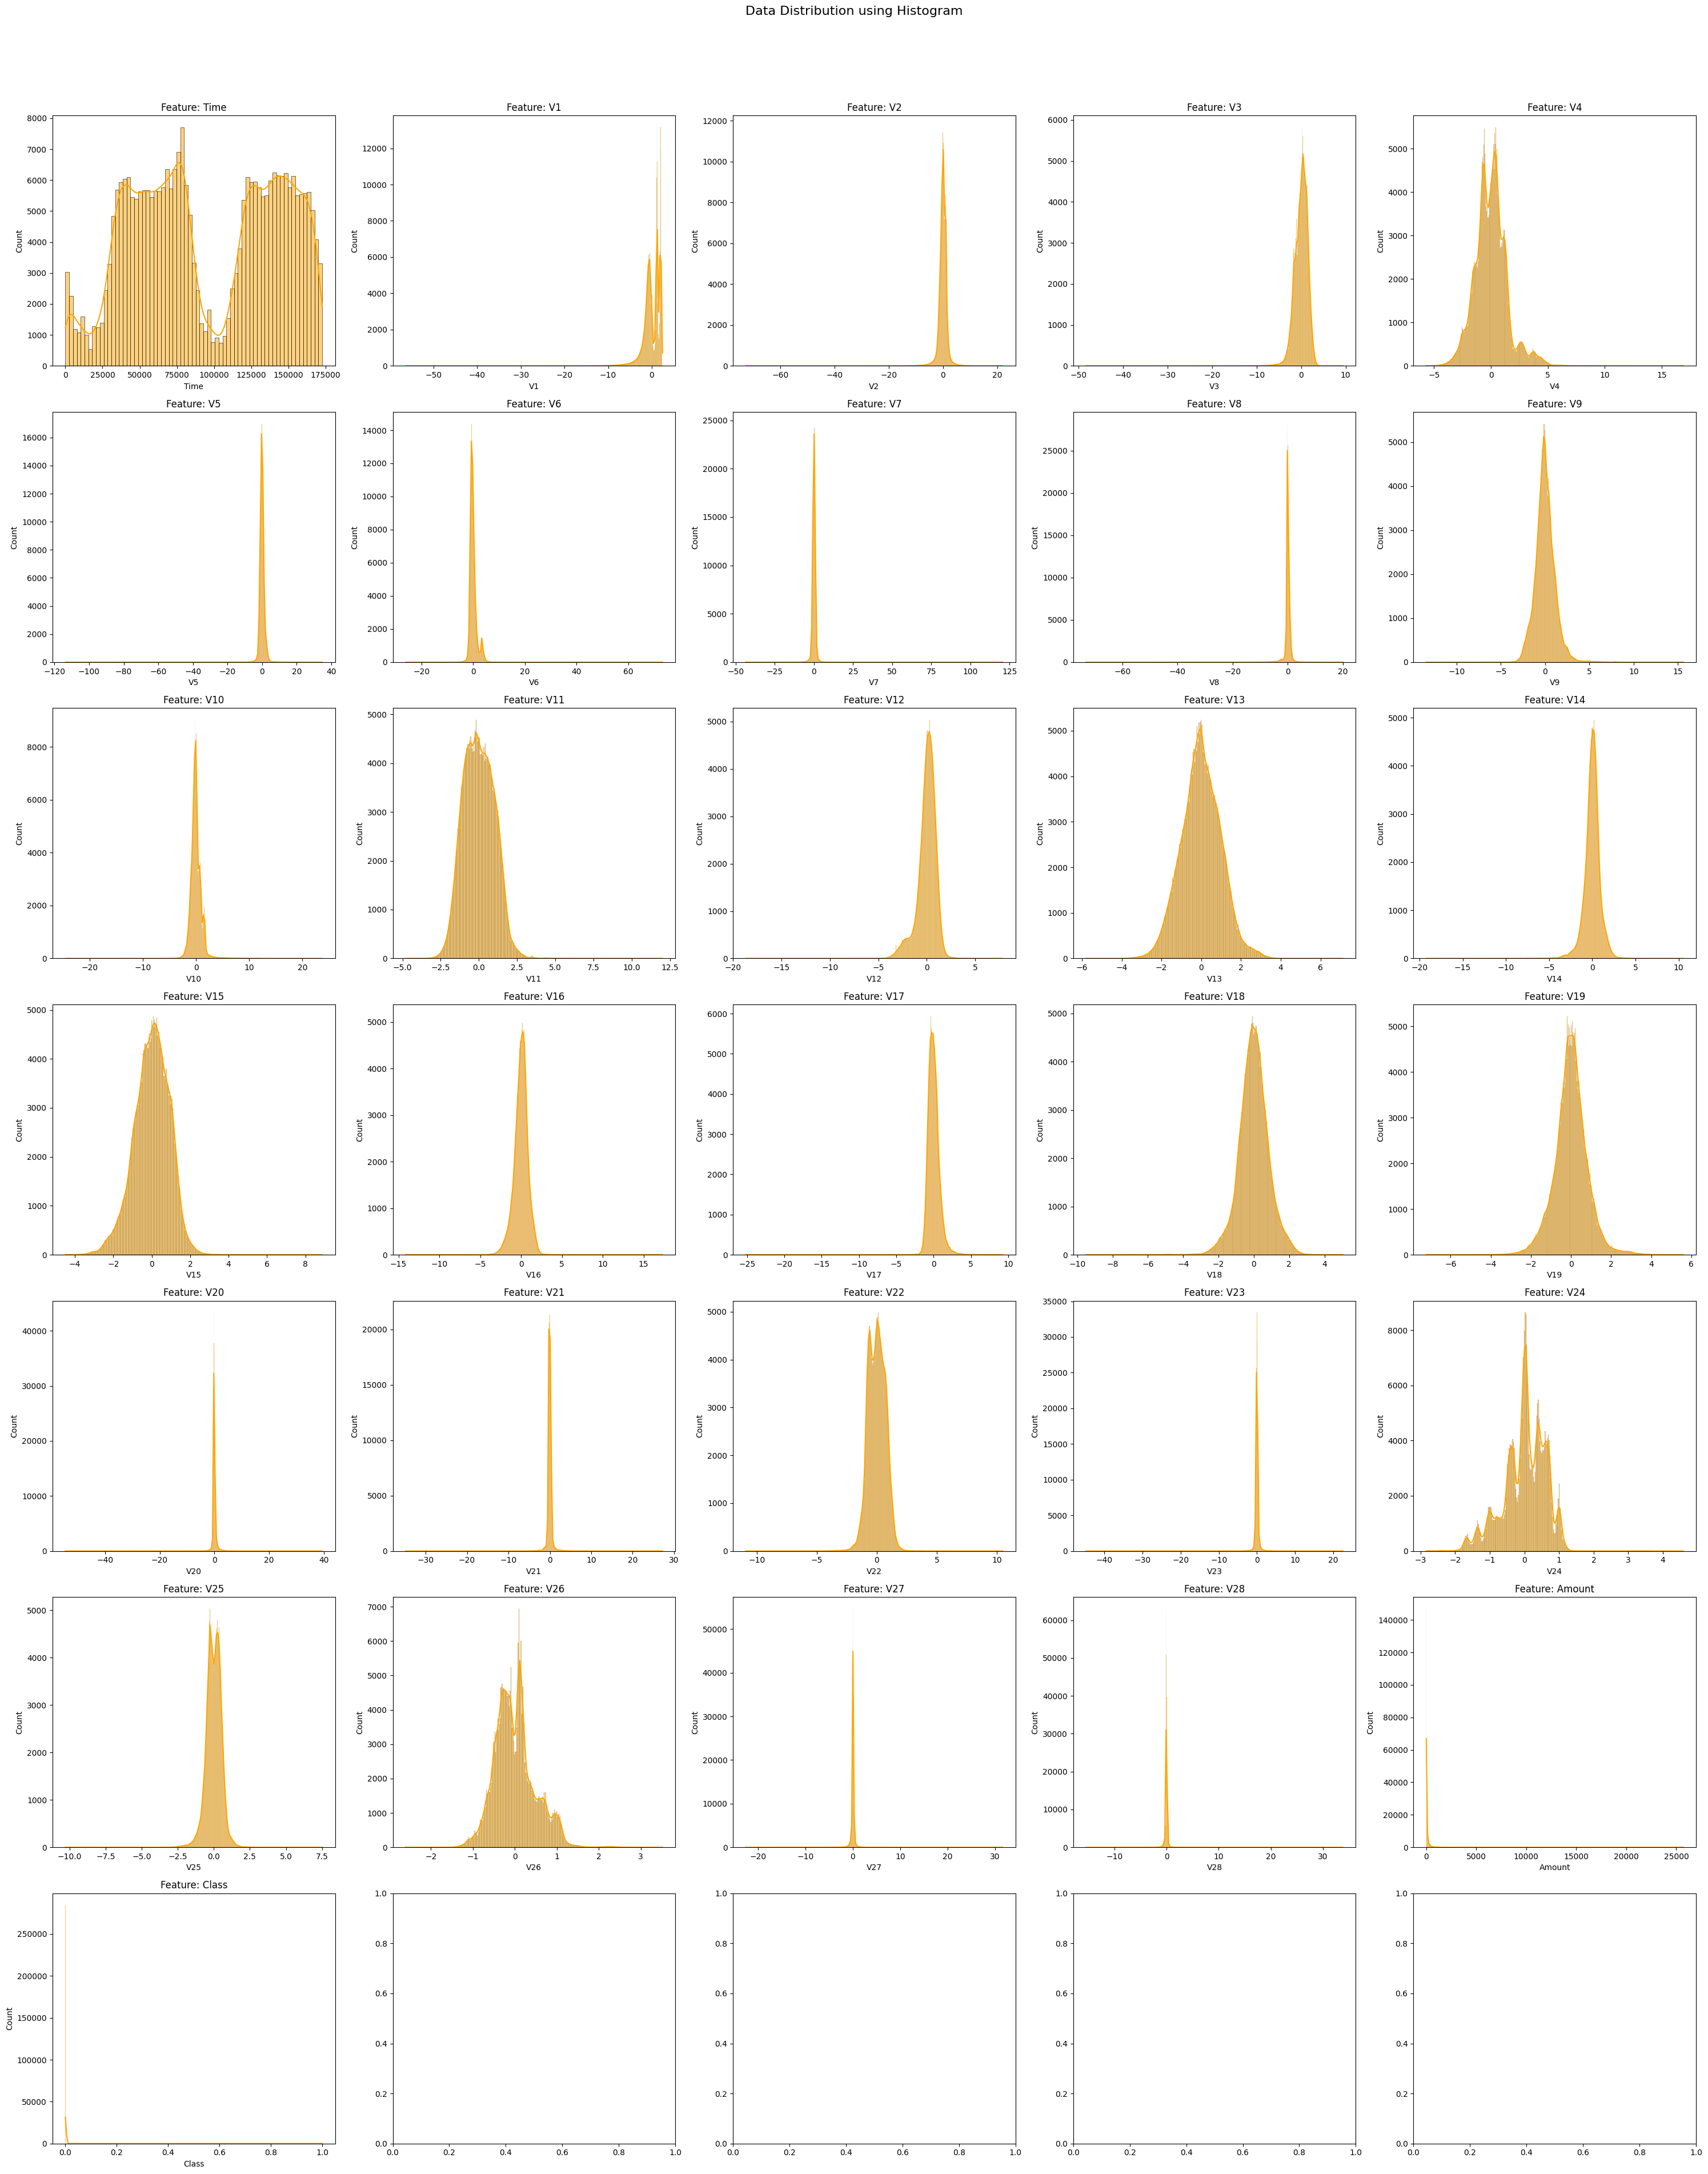

In [20]:
prep = importlib.reload(prep)

prep.sub_plot1(data_df, 7, 5, 30, 40, data_df.columns)

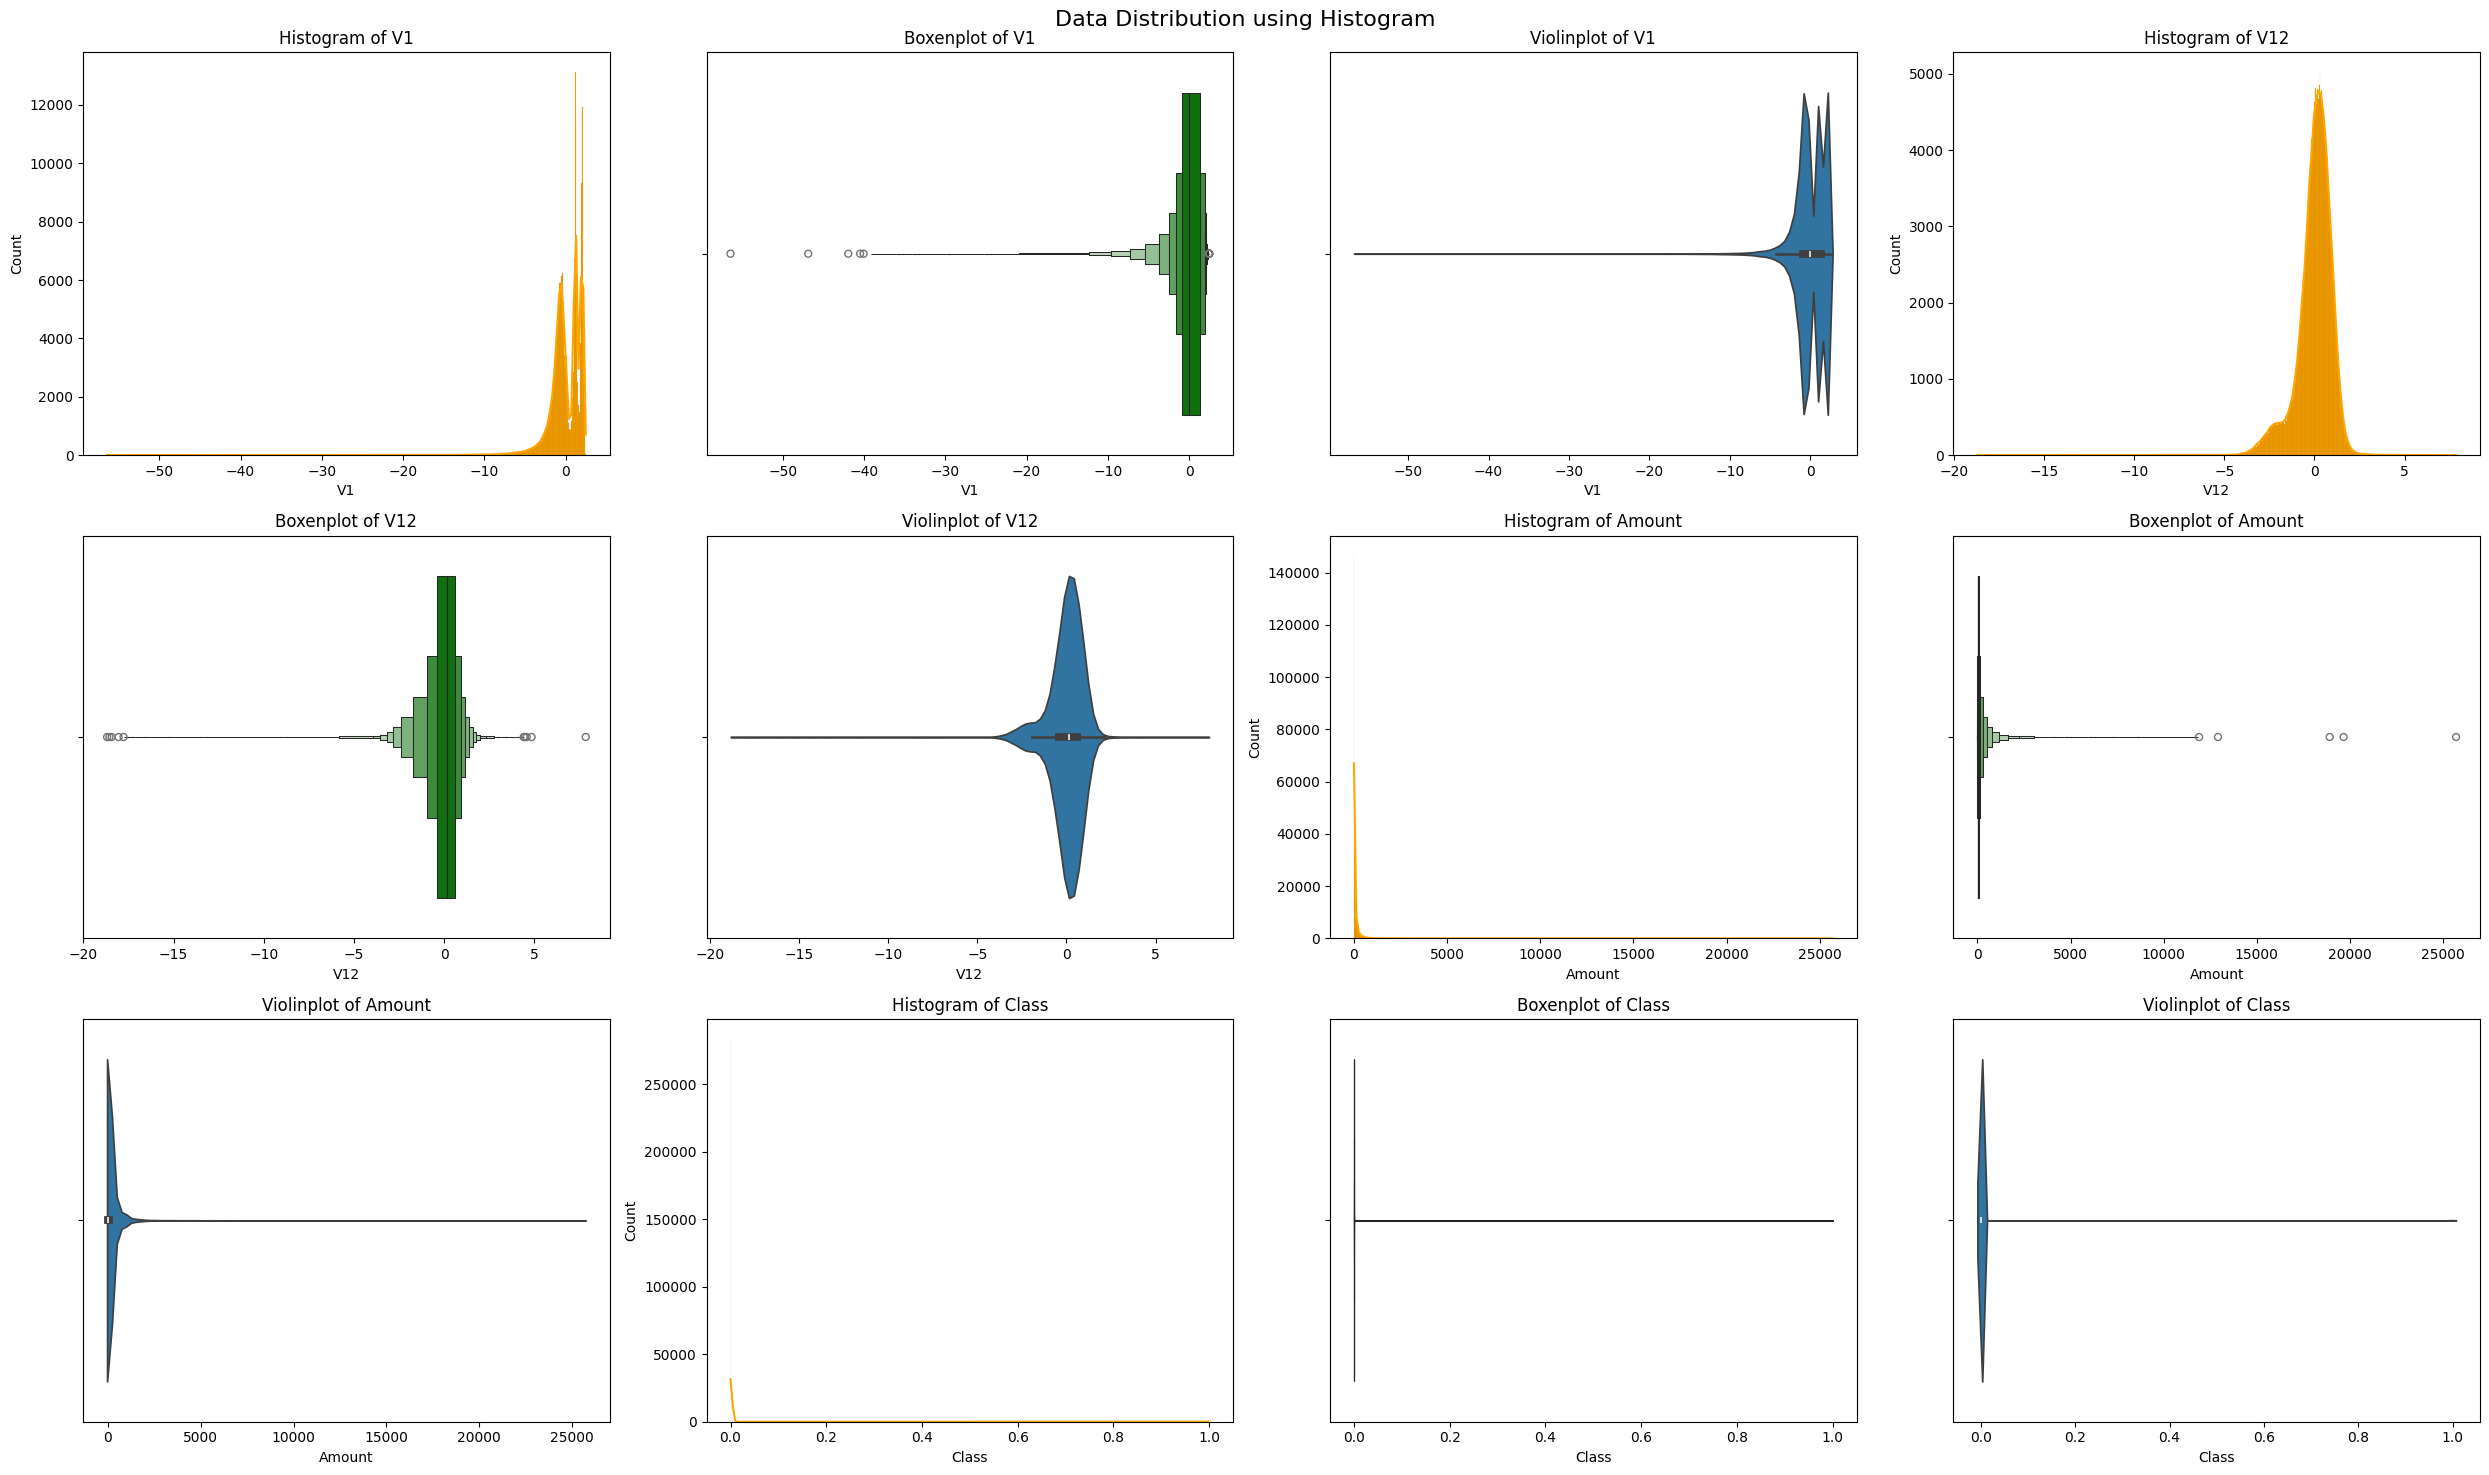

In [13]:
prep = importlib.reload(prep)
skewed_data = ["V1", "V12", "Amount", "Class"]
prep.sub_plot1(data_df[skewed_data], 3, 4, 25, 15, skewed_data)

NOTE: there is some skewed data and class imbalance, they must handle for better model.

In [33]:
#Detecting the outlier of the dataset
prep = importlib.reload(prep)

feature_cols = data_df.drop('Class', axis=1).columns
outlier_rows, outlier_only, outlier_element = prep.detect_outlier(data_df[feature_cols], feature_cols)
display(f"rows which have outlier: {outlier_rows.shape}")
display(f"columns which have outlier: {outlier_only.shape}")
display(f"original data shape: {data_df.shape}")

'rows which have outlier: (138473, 30)'

'columns which have outlier: (138473, 29)'

'original data shape: (284807, 31)'

In [16]:
outlier_counts = outlier_element.sum()
outlier_counts_ordered = outlier_counts.sort_values(ascending=False)   #the panda seres sorted by thier outlierd 
outlier_counts_col = outlier_counts_ordered.index.to_numpy()      #change type to numpy array to access the columns

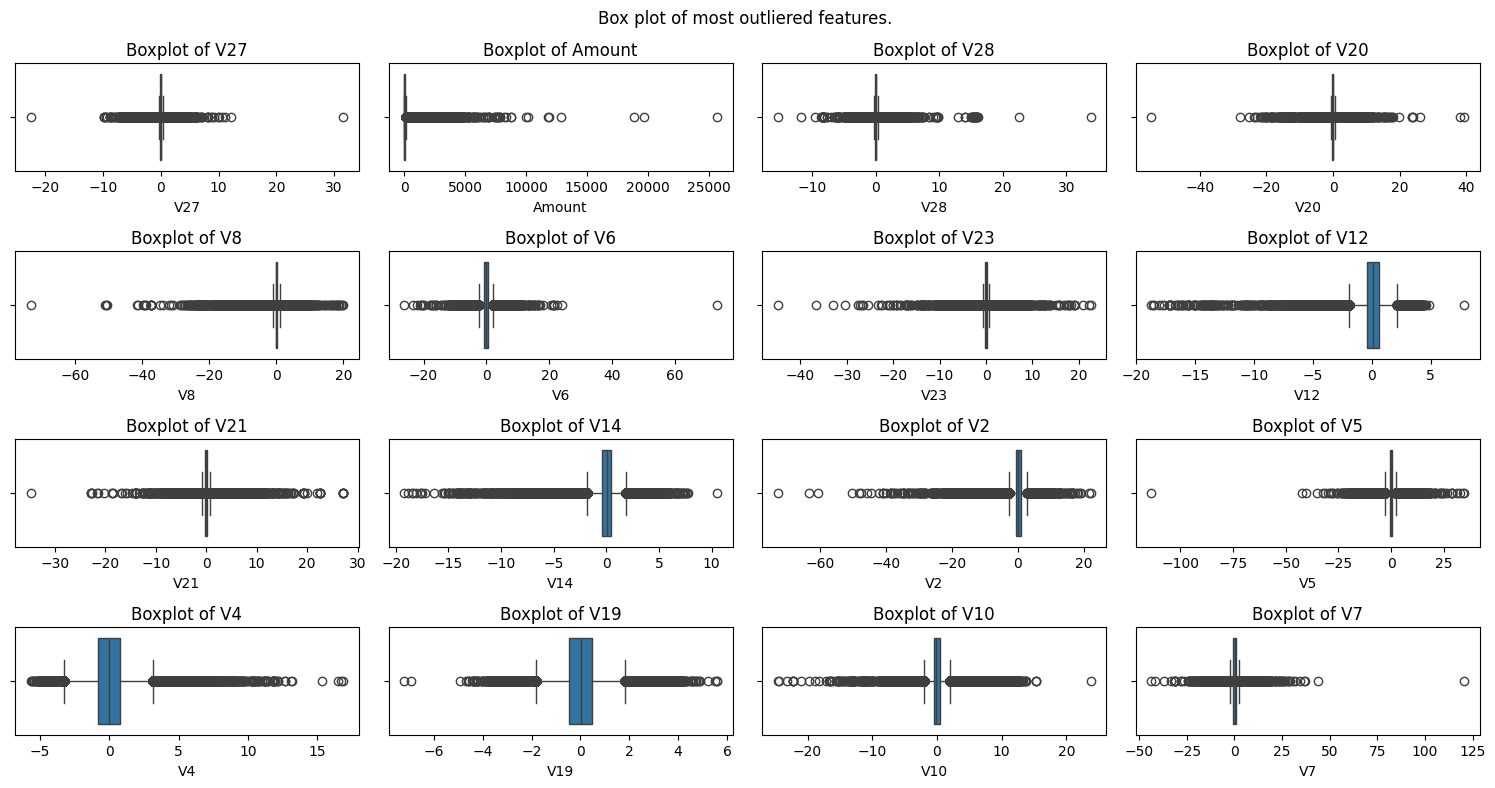

In [60]:
prep = importlib.reload(prep)

prep.box_plot(data_df[outlier_counts_col[:16]],4 ,4, 15, 8, outlier_counts_col[:16])

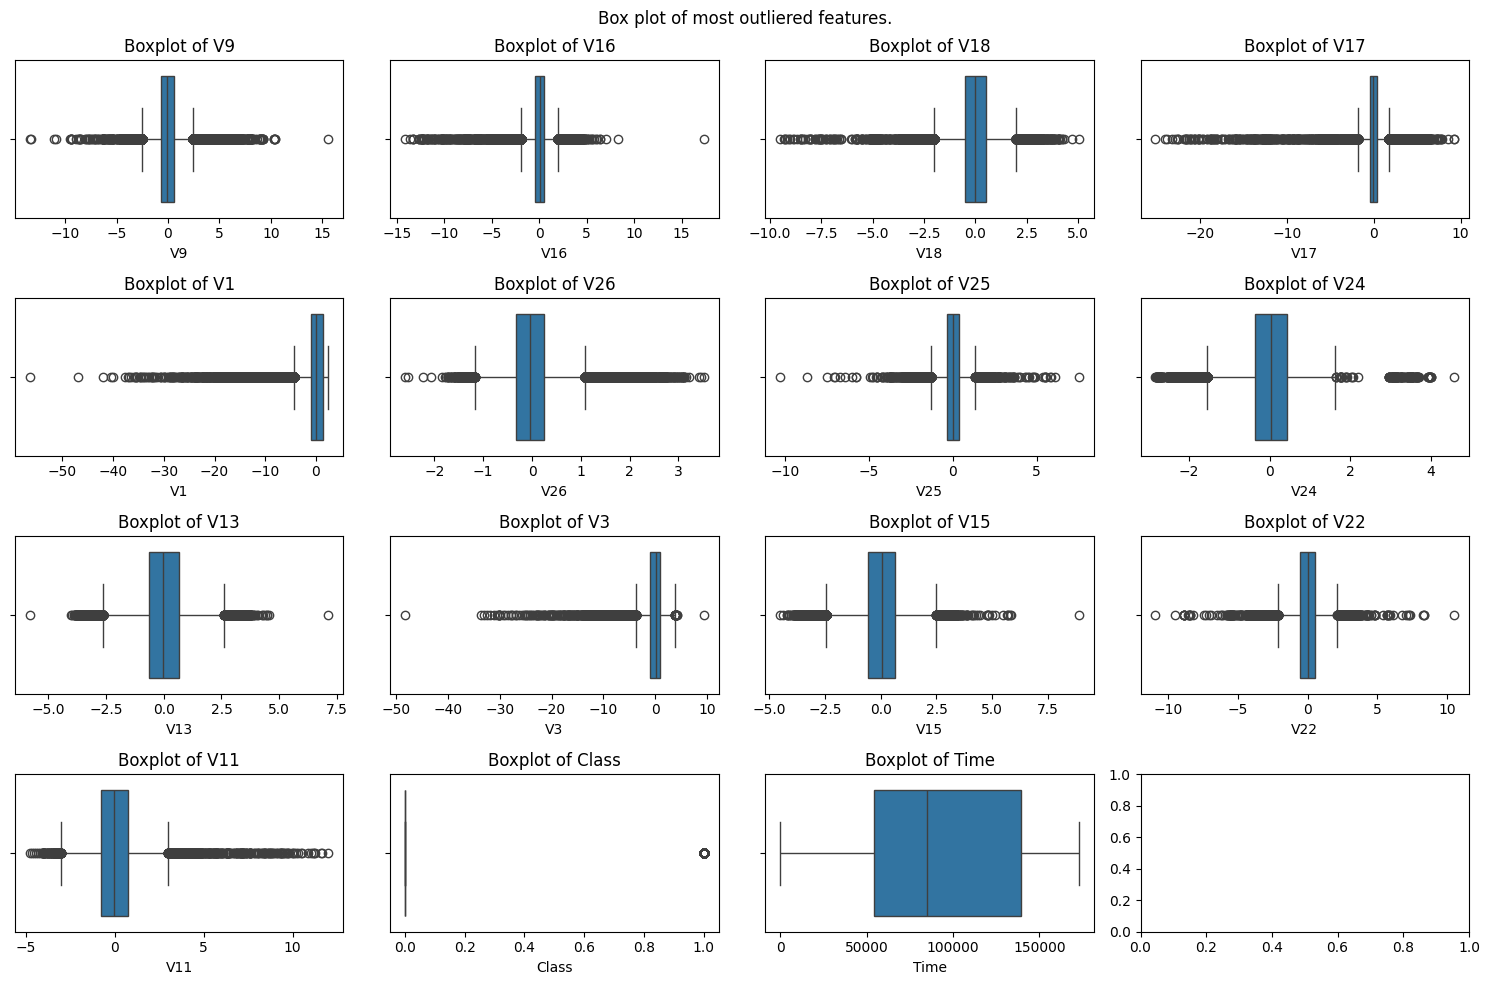

In [62]:
prep = importlib.reload(prep)

prep.box_plot(data_df[outlier_counts_col[16:32]],4 ,4, 15, 10, outlier_counts_col[16:])

### **Cleaning and Preprocessing**


##### **Handling Outliers**

In [8]:
from sklearn.model_selection import train_test_split
features = data_df.drop('Class', axis=1)
labels = data_df['Class']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

**Standard scaler**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)   #find the scaller on train data and assign the scaler value to scaler variable.
x_test_scaled = scaler.transform(x_test)

In [38]:
display(x_train.head(4))
display(pd.DataFrame(x_train_scaled, columns=x_train.columns).head(3))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.022555,0.997851,-0.229626,-0.207385,0.234215,-0.367791,-0.064022,-0.505889,0.030604,0.959955,...,-0.162507,0.324839,1.336699,0.084569,-0.459802,-0.084368,-0.448942,0.112489,-0.143741,-0.307889
1,0.471283,-0.205221,-0.378220,1.027544,-1.424101,-0.078380,0.126364,0.013567,-0.337559,0.035913,...,-0.608195,-0.209797,0.583086,0.180620,-1.658084,-2.253352,0.750588,-0.921898,-0.439841,-0.167026
2,1.153387,0.036558,0.495563,-0.370033,-0.500363,0.777856,-0.268414,0.632710,0.098986,-0.120484,...,0.015283,-0.429767,-1.201892,0.132700,0.245102,-0.825048,0.248488,0.513730,0.212358,-0.300043


In [ ]:
print(f"Class 0: {data_df["Class"].value_counts()[0]}")
print(f"Class 1: {data_df["Class"].value_counts()[1]}")
print(f"ratio: {data_df["Class"].value_counts()[0] / data_df["Class"].value_counts()[1]}")  #this shows how the class imbalance and i have to handle class imbalance.

Class 0: 284315
Class 1: 492
ratio: 577.8760162601626


## <font color="yellowgreen">**Train and evaluate the model without handling class imbalance**</font>

### **Train the Model**

**Now train the model without handling the class imbalance Using Linear and Tree based Models**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#assign the model
lin_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()

#train the models using train dataset
lin_model = lin_model.fit(x_train_scaled, y_train)
DT_model = DT_model.fit(x_train_scaled, y_train)
RF_model = RF_model.fit(x_train_scaled, y_train)

**Make prediction**

In [39]:
#make prediction for train data
lin_train_pred = lin_model.predict(x_train_scaled)
DT_train_pred = DT_model.predict(x_train_scaled)
RF_train_pred = RF_model.predict(x_train_scaled)

#meke preditions using test data
lin_test_pred = lin_model.predict(x_test_scaled)
DT_test_pred = DT_model.predict(x_test_scaled)
RF_test_pred = RF_model.predict(x_test_scaled)

In [40]:
from sklearn.metrics import classification_report

# display(classification_report(y_test, lin_test_pred))
print(type(lin_test_pred))

# keep only predicted frauds (value == 1) and cast to plain ints
fraud_predicted = [int(v) for v in lin_test_pred if v == 1]
legitmate_predicted = [int(v) for v in lin_test_pred if v == 0]
fraud_actual = [int(v) for v in y_test if v == 1]
legitmate_actual = [int(v) for v in y_test if v == 0]

#show how much the model is correctly classified the new unsean data for linear model
print(f"actual frauds: {len(fraud_actual)}")
print(f"Predicted frauds: {len(fraud_predicted)}")

print(f"actual legitimate: {len(legitmate_actual)}")
print(f"predicted legitimate: {len(legitmate_predicted)}")


<class 'numpy.ndarray'>
actual frauds: 98
Predicted frauds: 65
actual legitimate: 56864
predicted legitimate: 56897


total of obsercation: 227845
accuracy: 99.9%
precision: 88.4%
recall: 62.2%


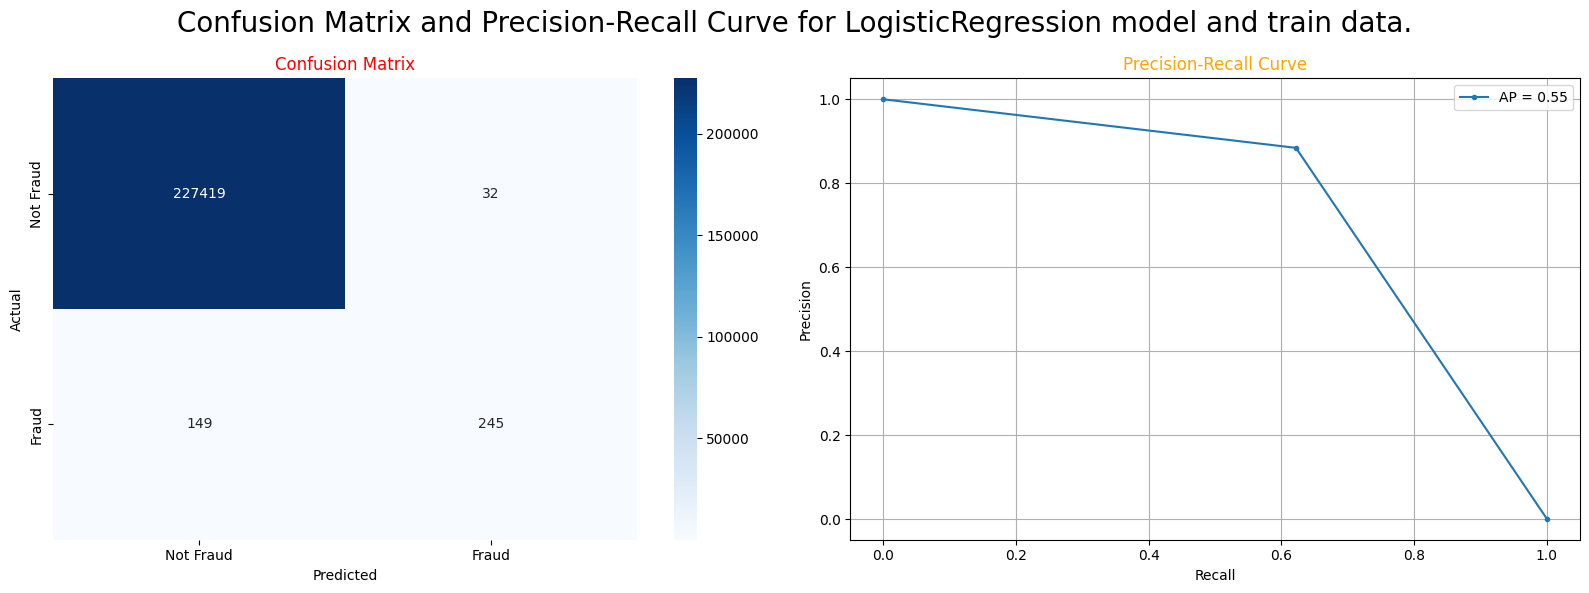

total of obsercation: 56962
accuracy: 99.9%
precision: 84.6%
recall: 56.1%


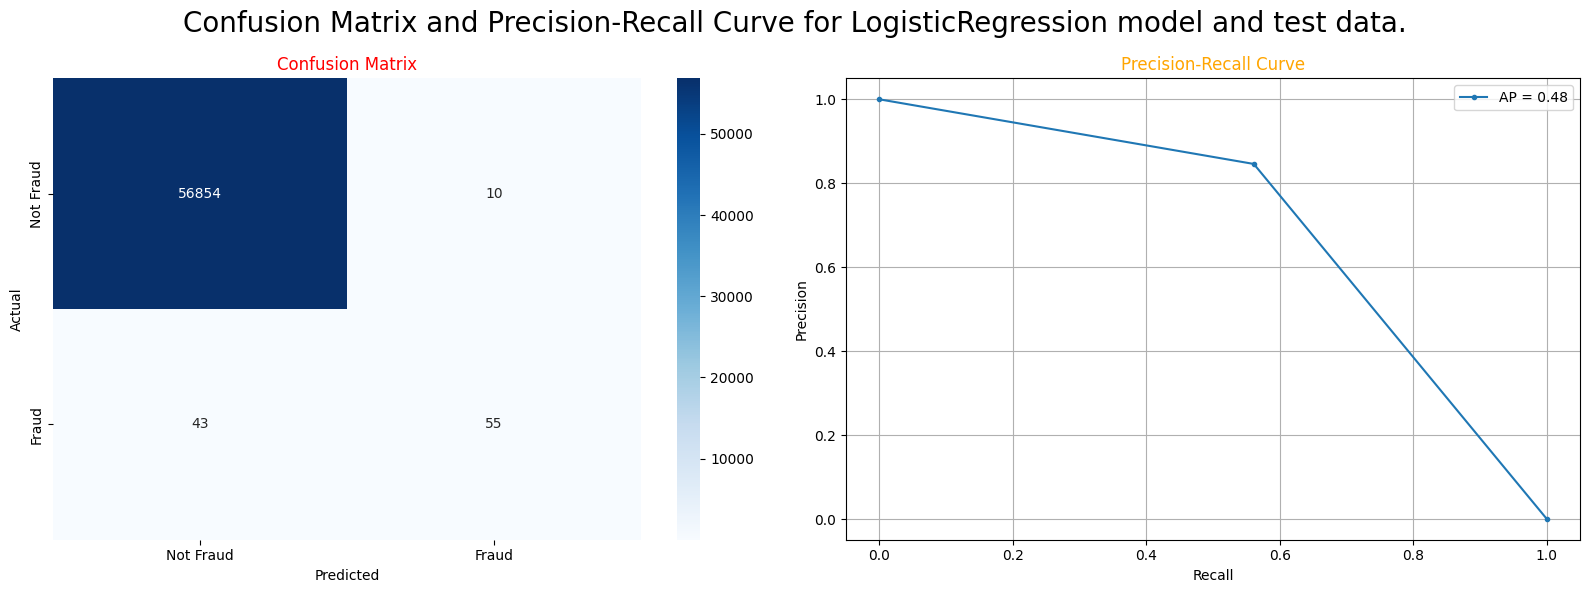

total of obsercation: 227845
accuracy: 100.0%
precision: 100.0%
recall: 100.0%


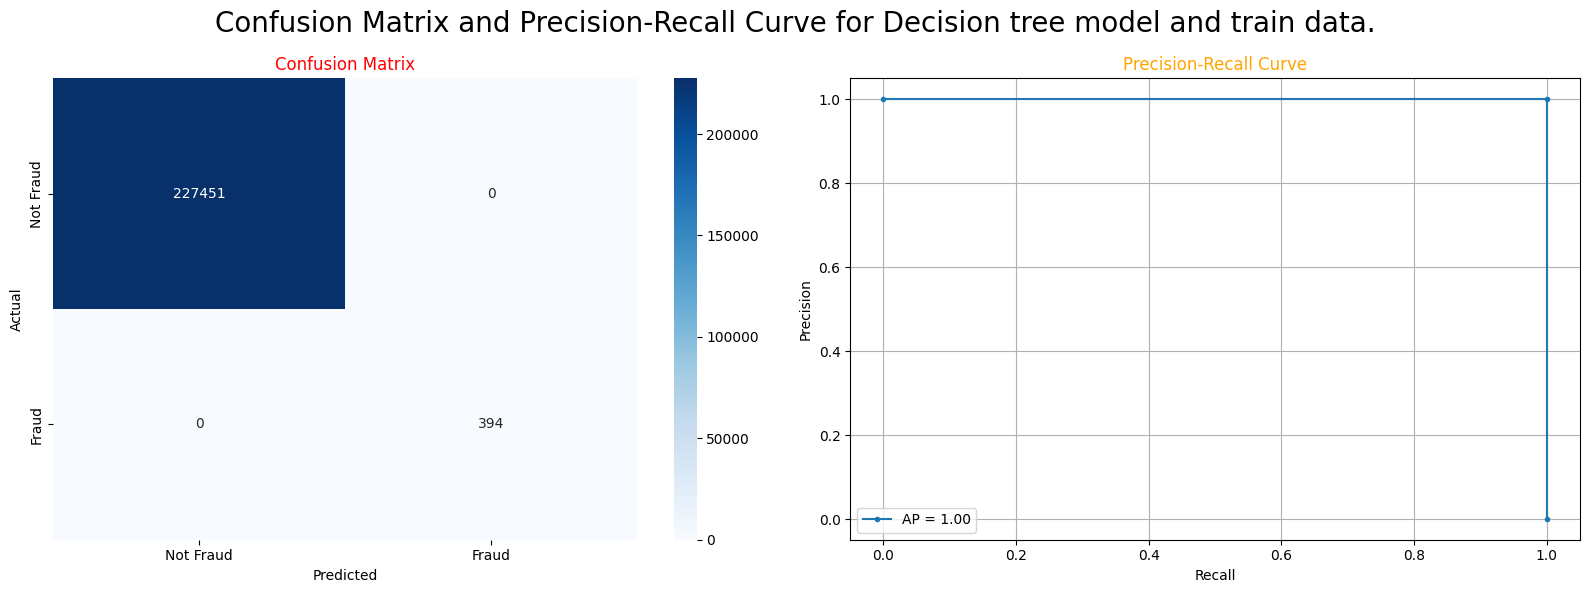

total of obsercation: 56962
accuracy: 99.9%
precision: 72.0%
recall: 78.6%


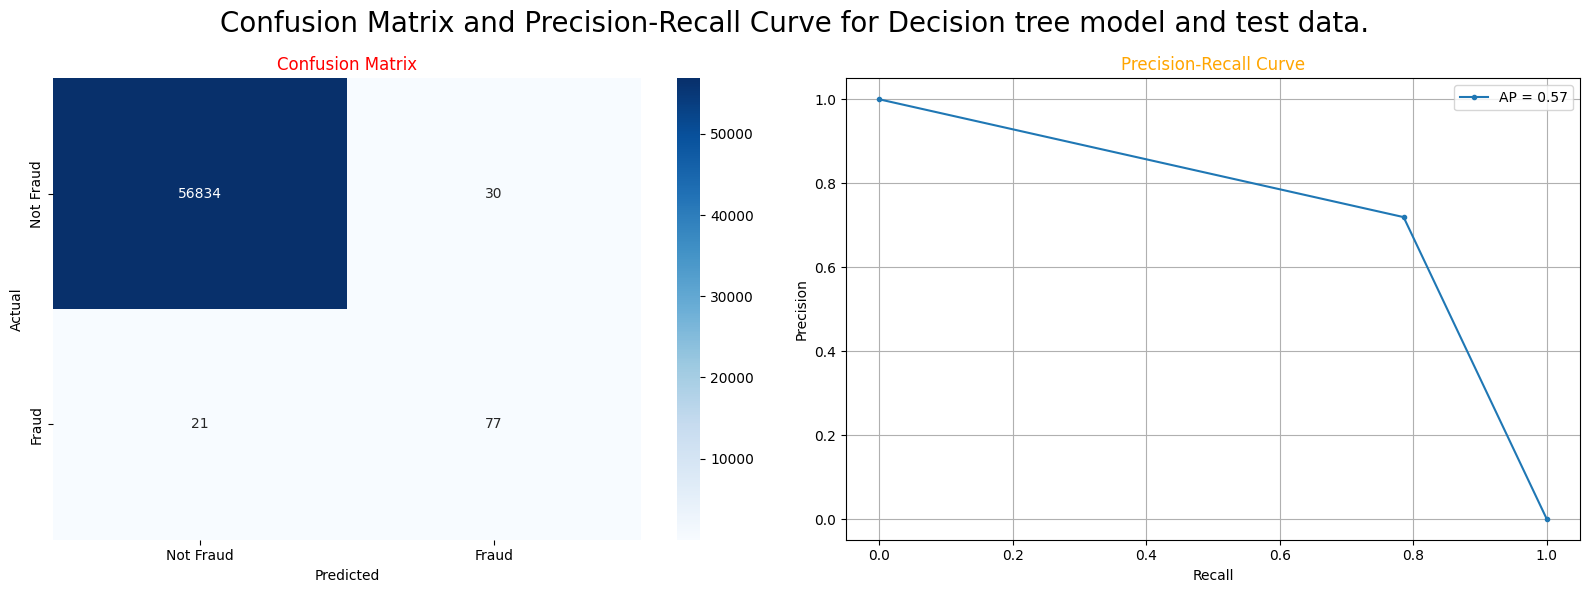

total of obsercation: 227845
accuracy: 100.0%
precision: 100.0%
recall: 100.0%


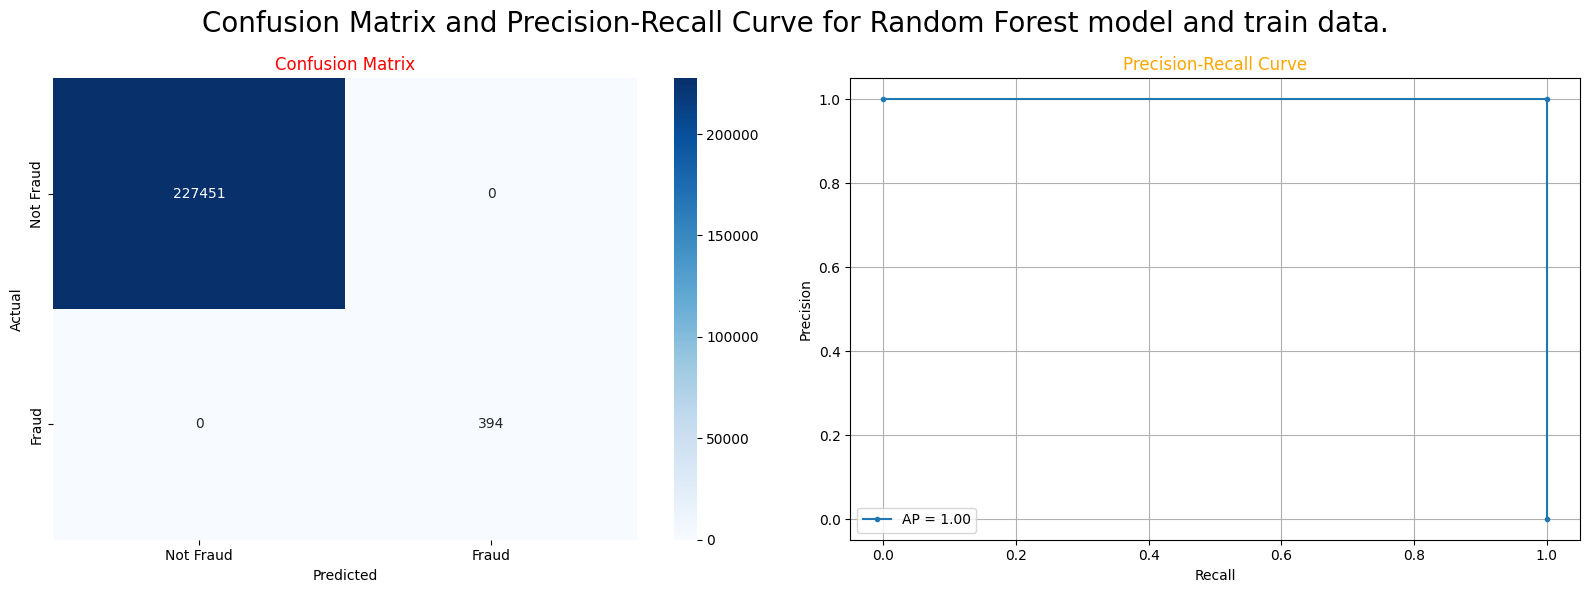

total of obsercation: 56962
accuracy: 100.0%
precision: 96.2%
recall: 78.6%


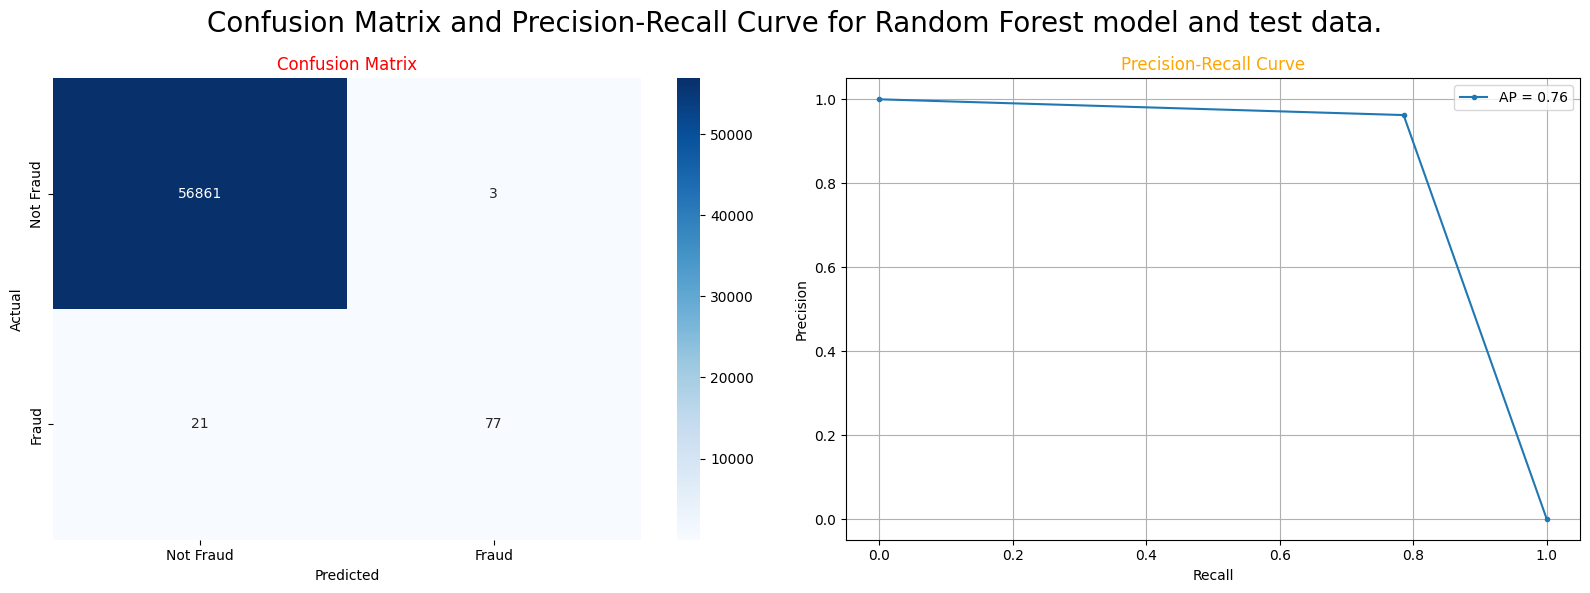

In [43]:
#analys and evaluation the performance of the model using confusion matrix
prep = importlib.reload(prep)

#for logistic regression model
prep.confusionM_RP_plot(actual=y_train, predicted=lin_train_pred, model="LogisticRegression", dataset="train")
prep.confusionM_RP_plot(actual=y_test, predicted=lin_test_pred, model="LogisticRegression", dataset="test")

#for decision tree model
prep.confusionM_RP_plot(actual=y_train, predicted=DT_train_pred, model="Decision tree", dataset="train")
prep.confusionM_RP_plot(actual=y_test, predicted=DT_test_pred, model="Decision tree", dataset="test")

#for random forest model
prep.confusionM_RP_plot(actual=y_train, predicted=RF_train_pred, model="Random Forest", dataset="train")
prep.confusionM_RP_plot(actual=y_test, predicted=RF_test_pred, model="Random Forest" , dataset="test")

In [134]:
# Check if Random Forest is just predicting majority class
from sklearn.metrics import average_precision_score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train_scaled, y_train)
dummy_ap = average_precision_score(y_test, dummy.predict_proba(x_test)[:, 1])
print(f"Dummy AP: {dummy_ap}")

Dummy AP: 0.0017204452090867595


**Train Using advanced Models**

In [10]:
import xgboost as xgb
import catboost as catb
import lightgbm 


#model declaration
XGB_model = xgb.XGBClassifier()
CAT_model = catb.CatBoostClassifier()
LGB_model = lightgbm.LGBMClassifier()

#then train the model using train data

XGB_model.fit(x_train, y_train)  #there is overfitting in this model

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [ ]:
#using catBoosting model

CAT_model.fit(x_train, y_train, verbose=False)   #This model is also overfitted

In [ ]:
#using lightBoosting machine model

LGB_model.fit(x_train, y_train)    #This model is the worest model 

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


**Model Evaluation**

Using XGBoosting model

total of obsercation: 227845
accuracy: 100.0%
precision: 100.0%
recall: 100.0%


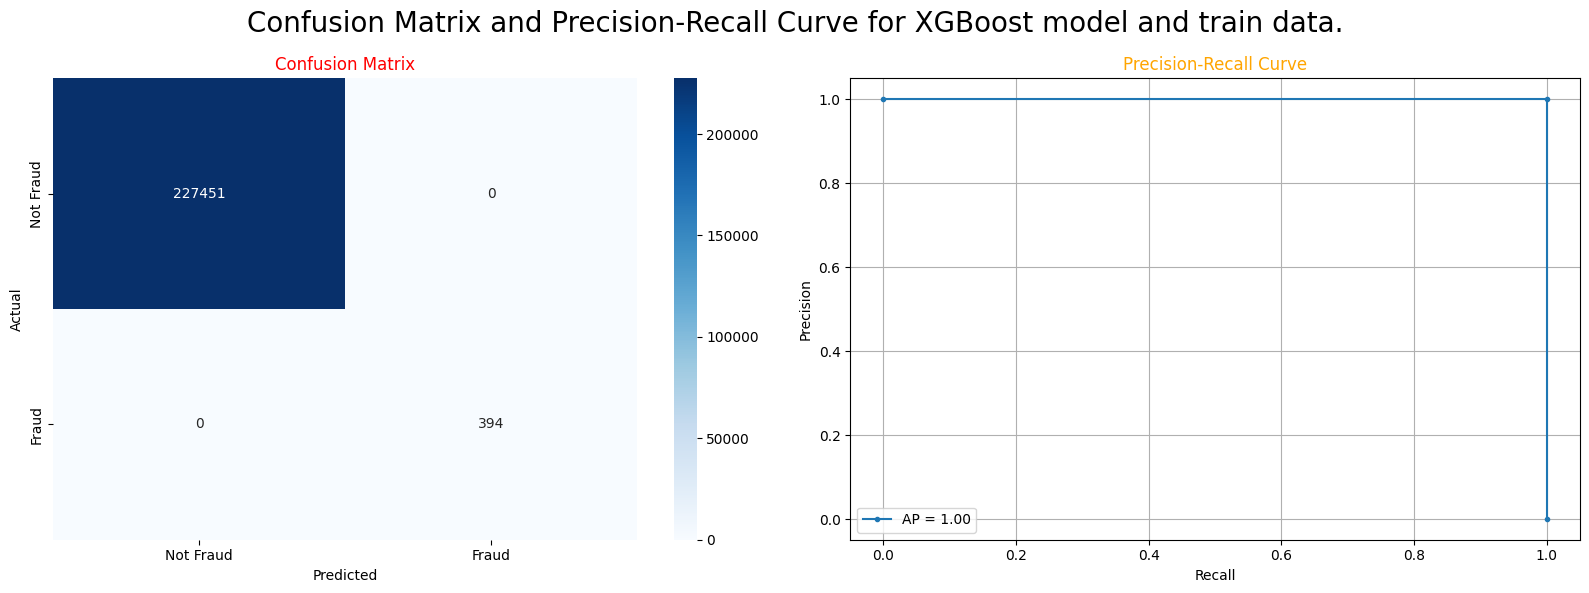

total of obsercation: 56962
accuracy: 100.0%
precision: 80.6%
recall: 94.0%


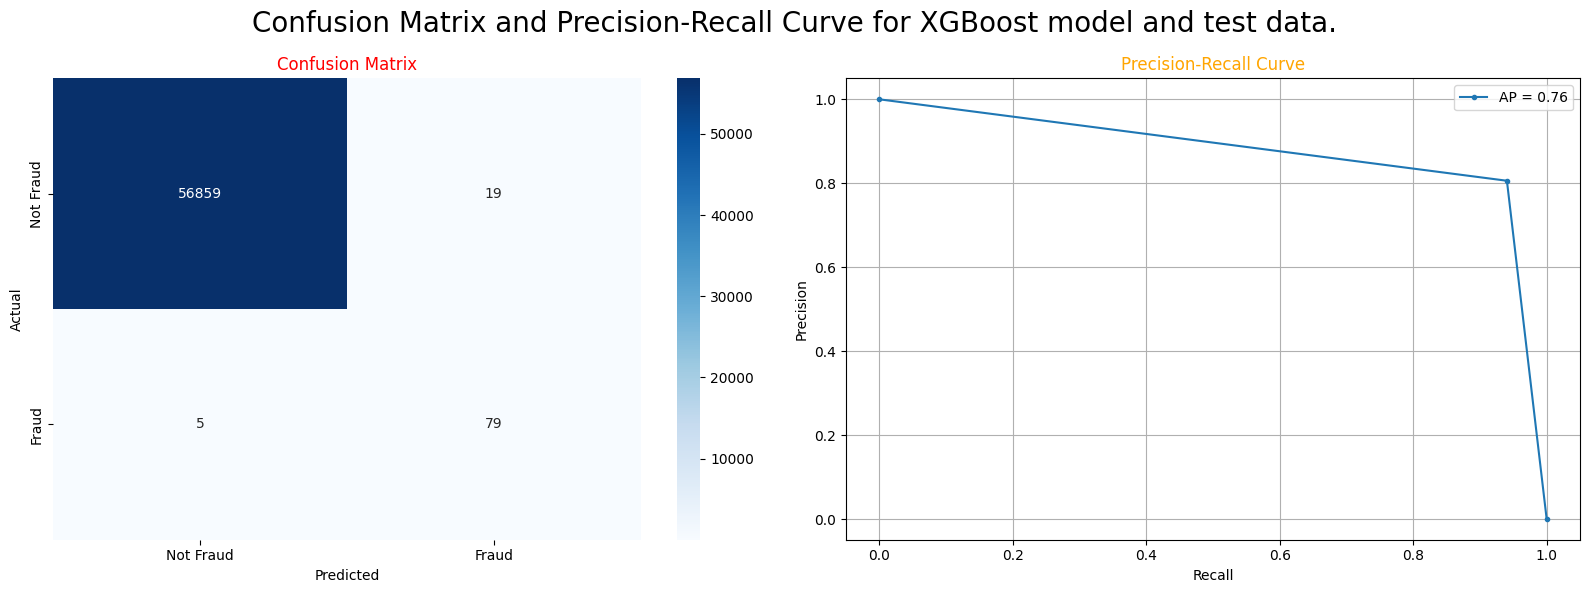

In [34]:
from sklearn.metrics import classification_report
prep = importlib.reload(prep)


#make prediction
xgb_train_pre = XGB_model.predict(x_train)
xgb_test_pred = XGB_model.predict(x_test)

#model evaluation
# print(classification_report(y_test, xgb_test_pred))
prep.confusionM_RP_plot(xgb_train_pre, y_train, model="XGBoost", dataset="train")
prep.confusionM_RP_plot(xgb_test_pred, y_test, model="XGBoost", dataset="test")

Using CatBosst model

total of obsercation: 227845
accuracy: 100.0%
precision: 100.0%
recall: 100.0%


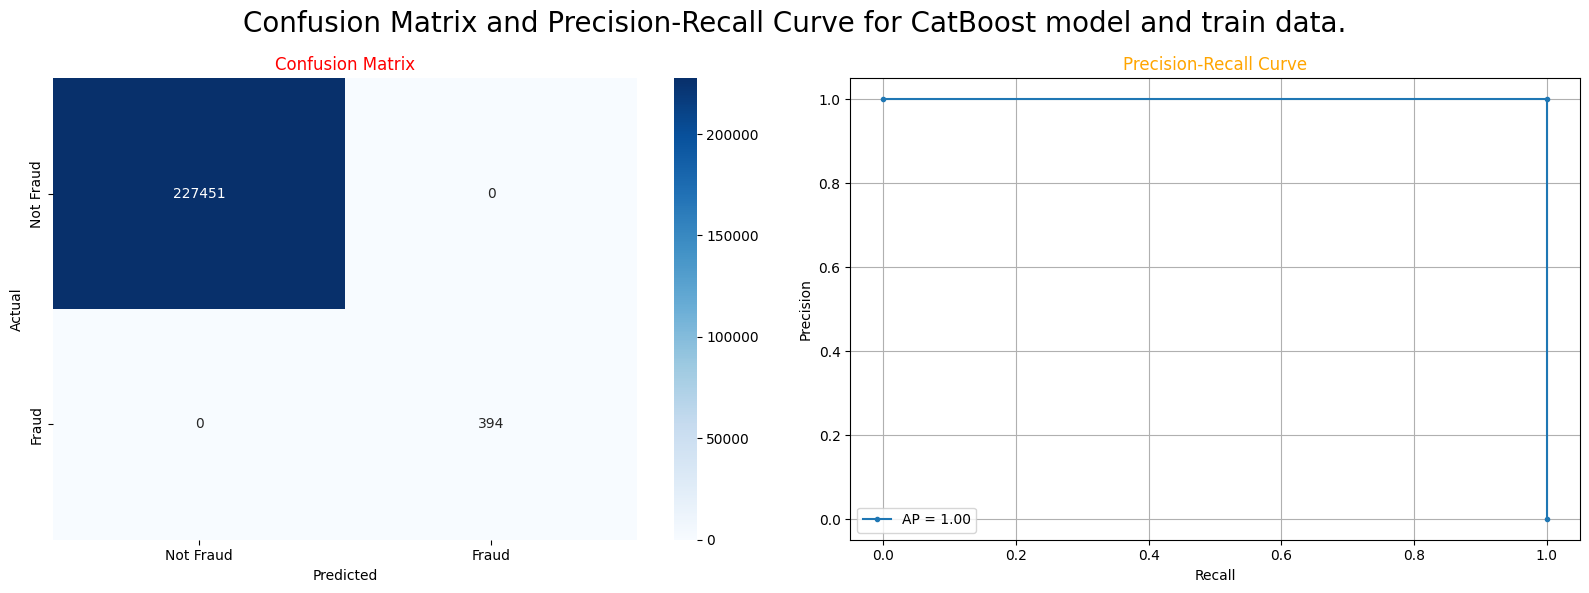

total of obsercation: 56962
accuracy: 100.0%
precision: 81.6%
recall: 97.6%


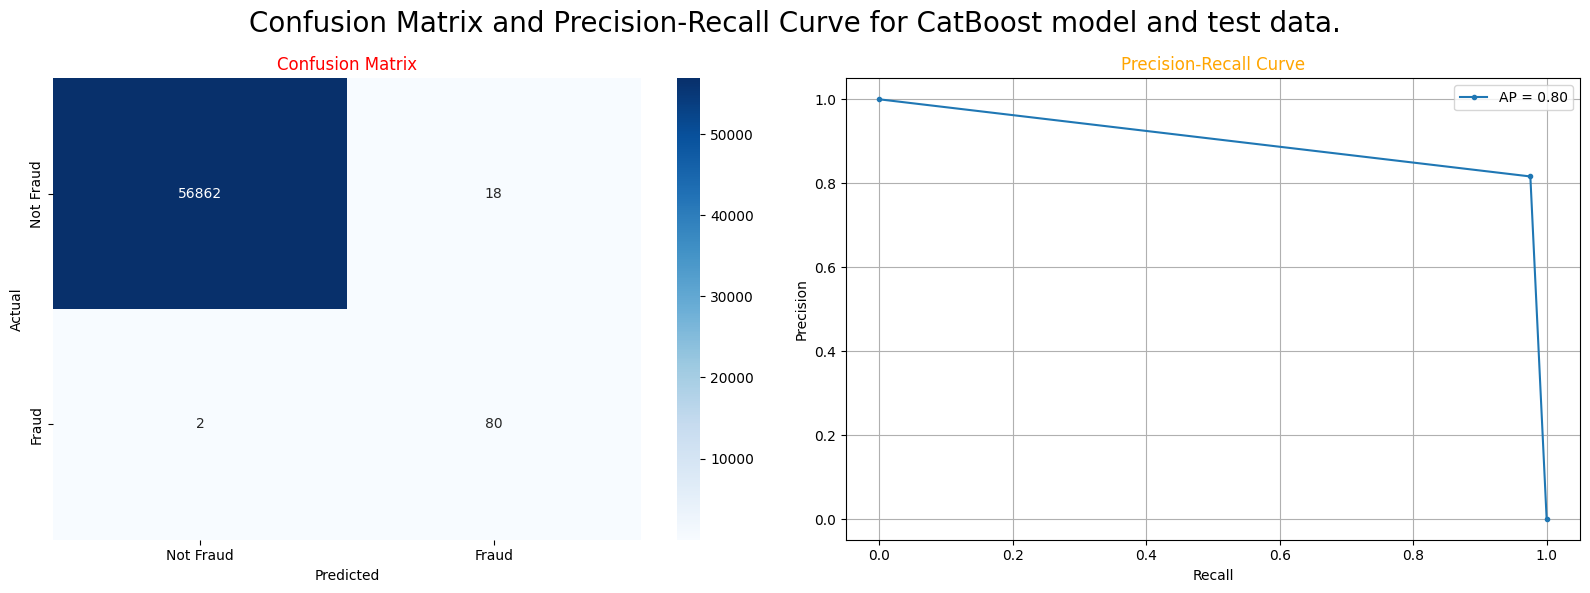

In [35]:
#make prediction
cat_train_pred = CAT_model.predict(x_train)
cat_test_pred = CAT_model.predict(x_test)

#model evaluation
prep.confusionM_RP_plot(cat_train_pred, y_train, model="CatBoost", dataset="train")
prep.confusionM_RP_plot(cat_test_pred, y_test, model="CatBoost", dataset="test")

Using LighBoost machine model

total of obsercation: 227845
accuracy: 99.7%
precision: 35.8%
recall: 30.3%


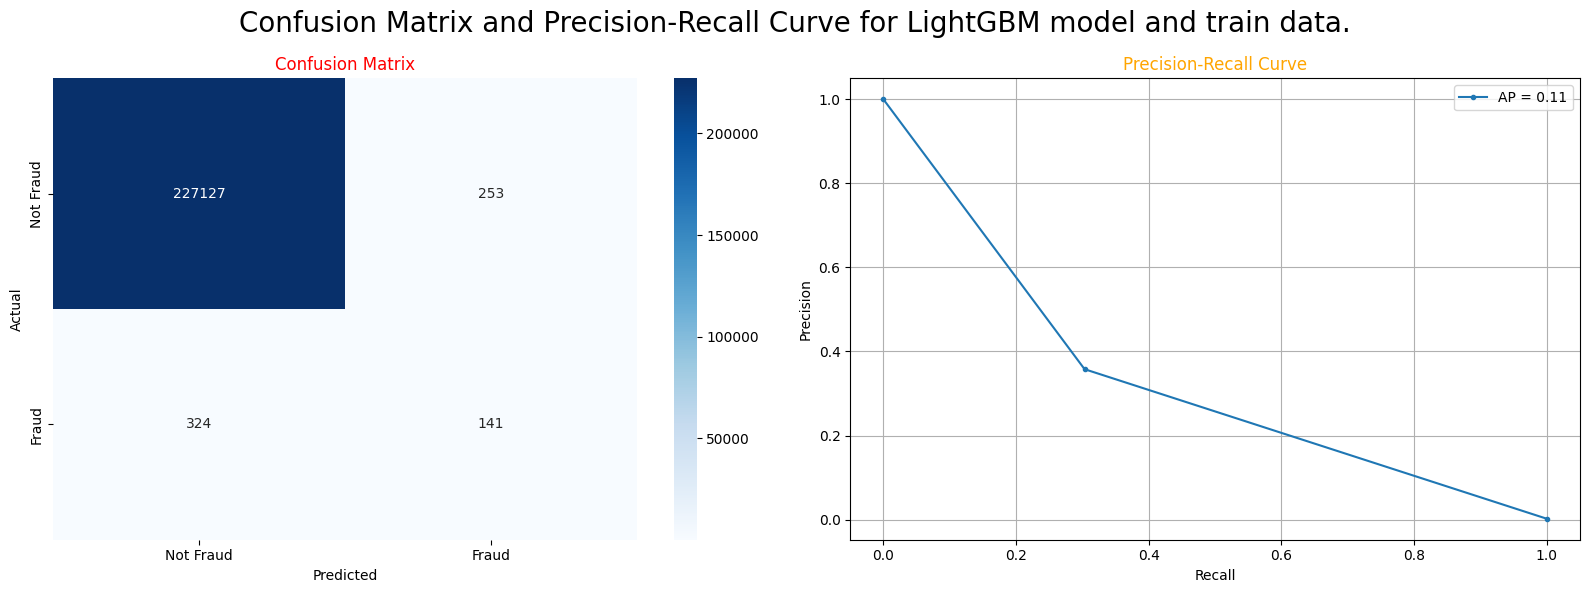

total of obsercation: 56962
accuracy: 99.7%
precision: 37.8%
recall: 29.1%


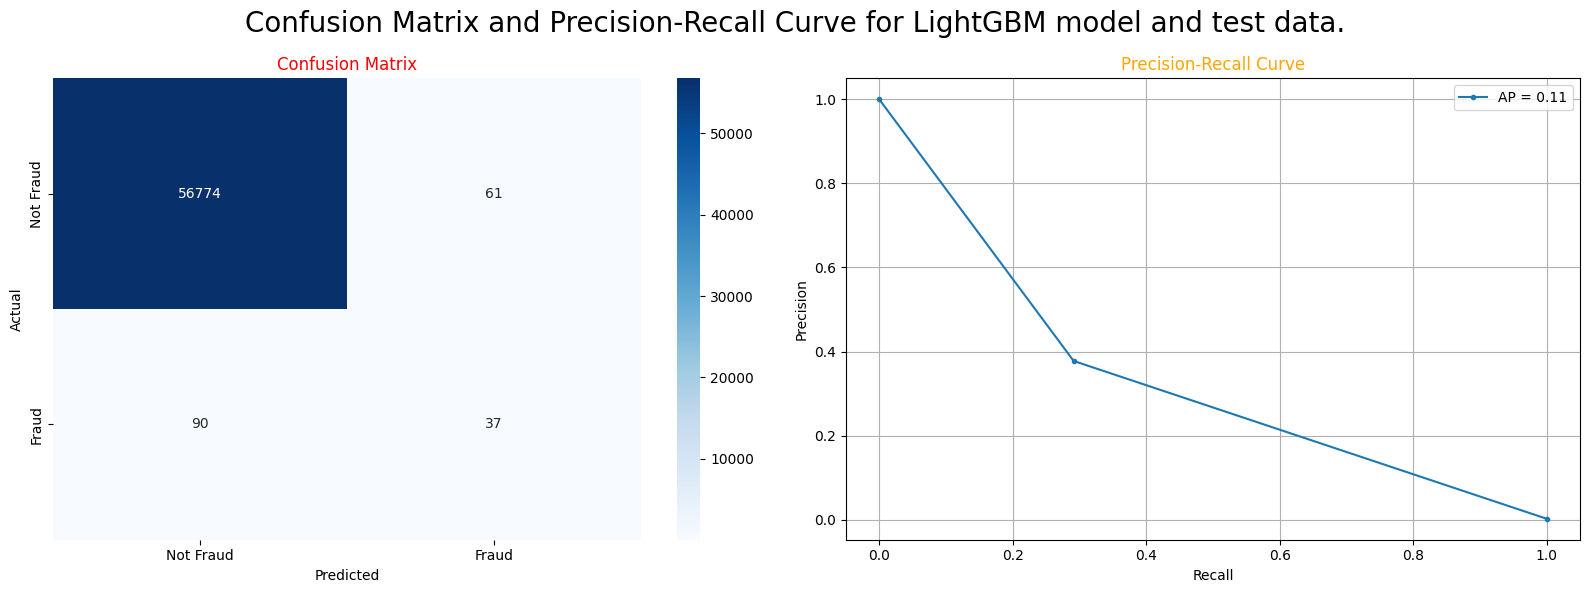

In [36]:
#make prediction 
lbm_train_pred = LGB_model.predict(x_train)
lbm_test_pred = LGB_model.predict(x_test)

#Evaluation of the model
prep.confusionM_RP_plot(lbm_train_pred, y_train, model="LightGBM", dataset="train")
prep.confusionM_RP_plot(lbm_test_pred, y_test, model="LightGBM", dataset="test")

## <font color="yellowgreen">**Train and evaluate the model with balanced class**</font>

**Weight Balancing Technique**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

Y_class = np.unique(y_train)

class_weight = compute_class_weight("balanced", classes=Y_class, y=y_train)
class_weight_dic = dict(zip(Y_class, class_weight))                           #This is the wight for the two classes.

display(pd.DataFrame(class_weight_dic.items(), columns=["Class", "Weight"]))

,Class,Weight
0,0,0.500866
1,1,289.143401


In [57]:
BLin_model = LogisticRegression(class_weight=class_weight_dic, max_iter=1000, solver="lbfgs")
BLin_model.fit(x_train, y_train)

/home/nigatie/Documents/ML_DL/Machine_Learning/.VE_ML/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*","{np.int64(0): np.float64(0.5008661206149896), np.int64(1): np.float64(289.14340101522845)}"
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good defau

In [58]:
#make prediction
BLi_train_pred = BLin_model.predict(x_train)

total of obsercation: 227845
accuracy: 99.9%
precision: 88.4%
recall: 62.2%


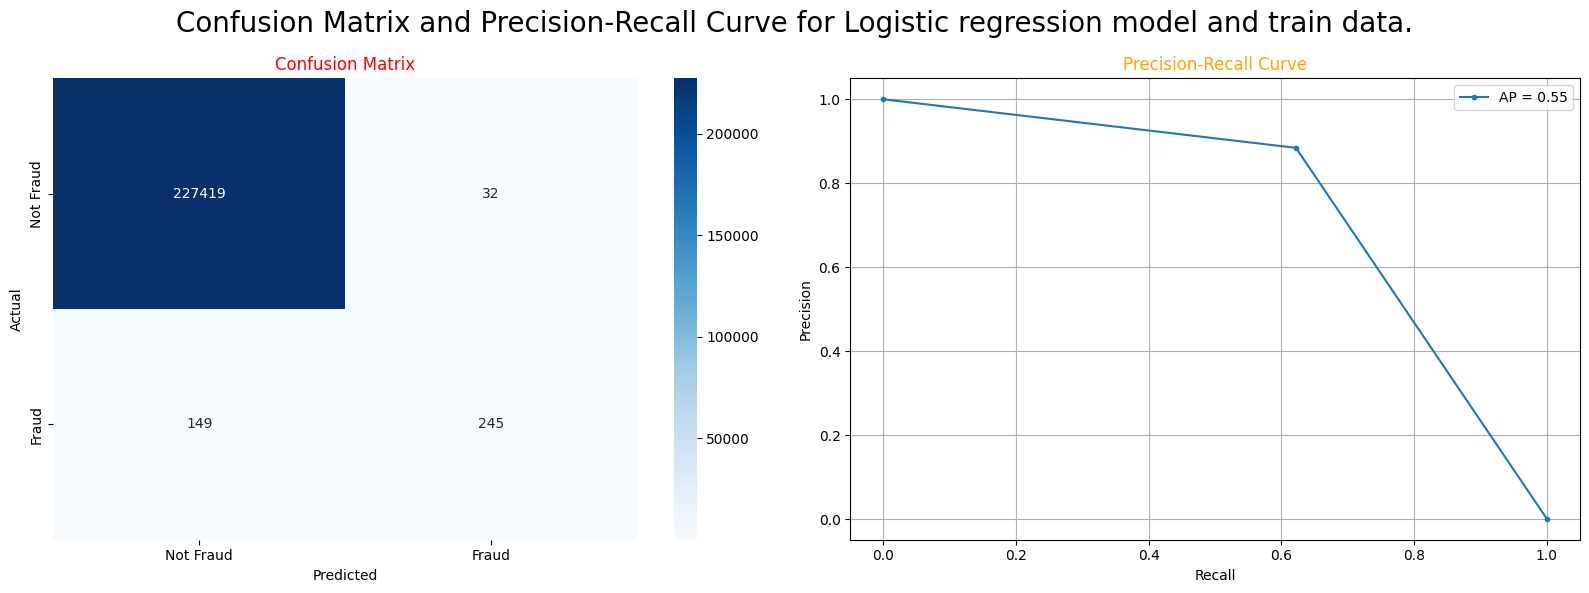

total of obsercation: 227845
accuracy: 96.8%
precision: 4.7%
recall: 91.9%


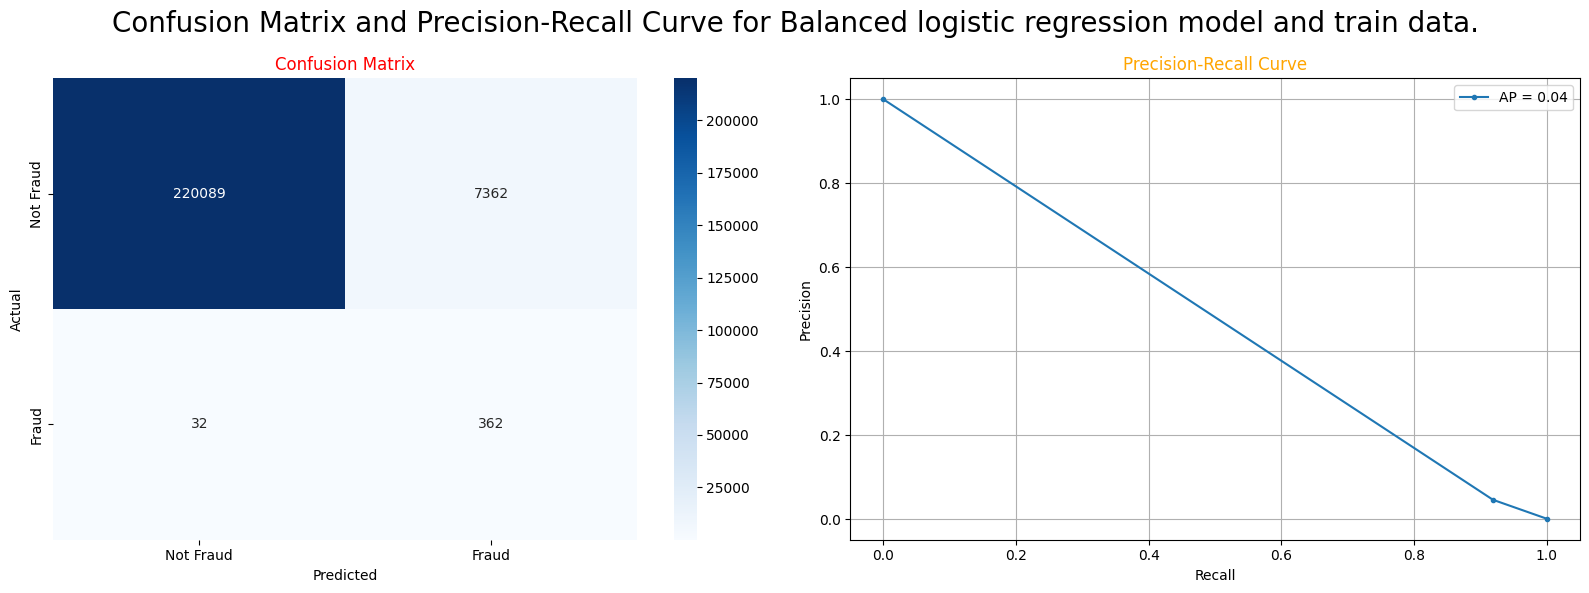

In [59]:
prep = importlib.reload(prep)

prep.confusionM_RP_plot(actual=y_train, predicted=lin_train_pred, model="Logistic regression", dataset="train")
prep.confusionM_RP_plot(actual=y_train, predicted=BLi_train_pred, model="Balanced logistic regression", dataset="train")

In [61]:
BDT_model = DecisionTreeClassifier(class_weight=class_weight_dic)
BDT_model.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [62]:
#make prediction
BDT_train_pred = BDT_model.predict(x_train)
BDT_test_pred =BDT_model.predict(x_test)

total of obsercation: 227845
accuracy: 100.0%
precision: 100.0%
recall: 100.0%


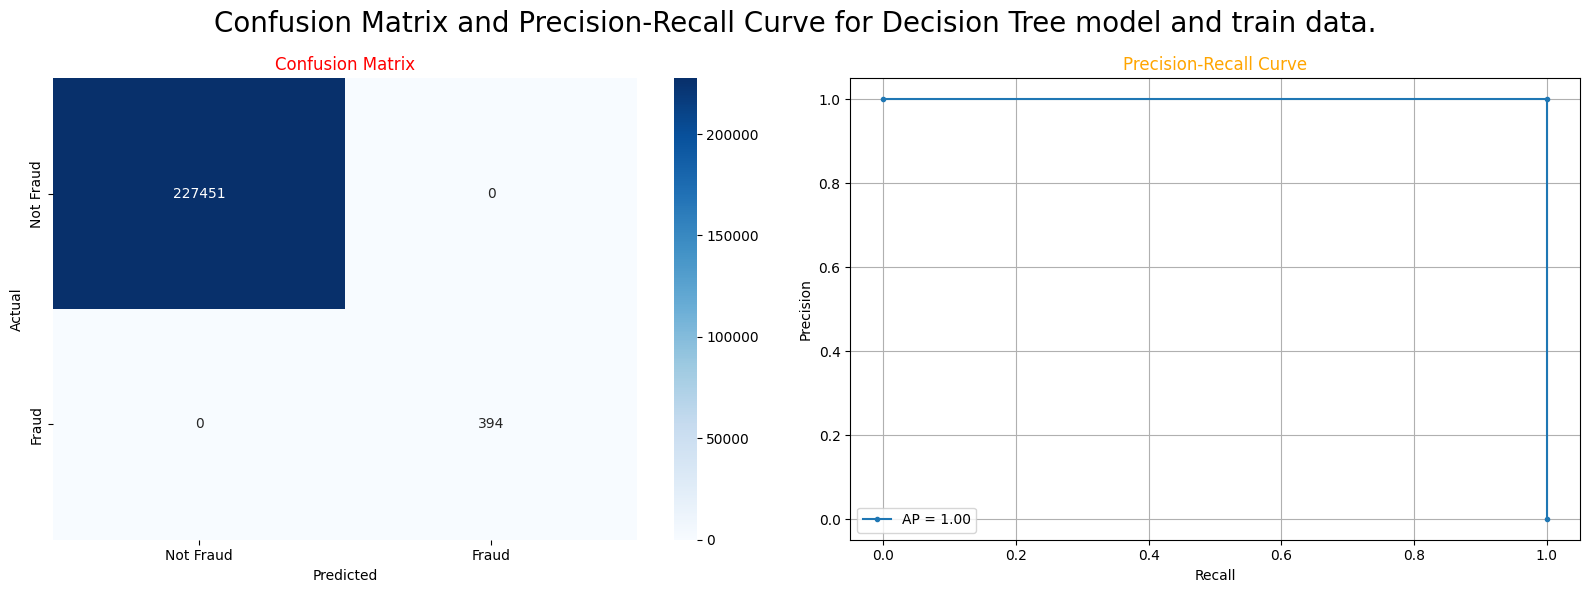

total of obsercation: 56962
accuracy: 99.9%
precision: 73.3%
recall: 75.5%


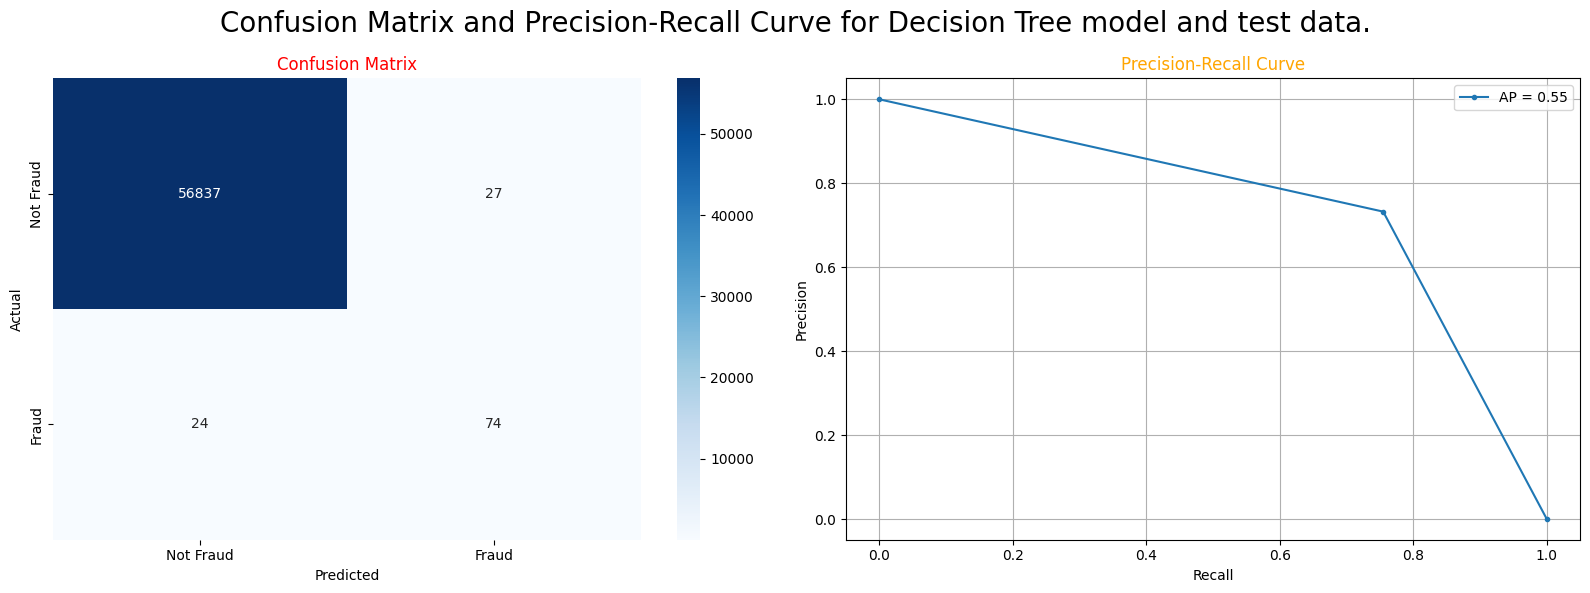

In [ ]:
#model evalueation

prep.confusionM_RP_plot(actual=y_train, predicted=BDT_train_pred, model="Decision Tree", dataset="train")
prep.confusionM_RP_plot(actual=y_test, predicted=BDT_test_pred, model="Decision Tree", dataset="test")

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

smote = SMOTE(random_state=2, sampling_strategy= 0.5)
Miss = NearMiss(sampling_strategy=0.5)

x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

In [25]:
#Now train the model again using oversampled data

lin_model.fit(x_train_res, y_train_res)
test_pred = lin_model.predict(x_test_scaled)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.92      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



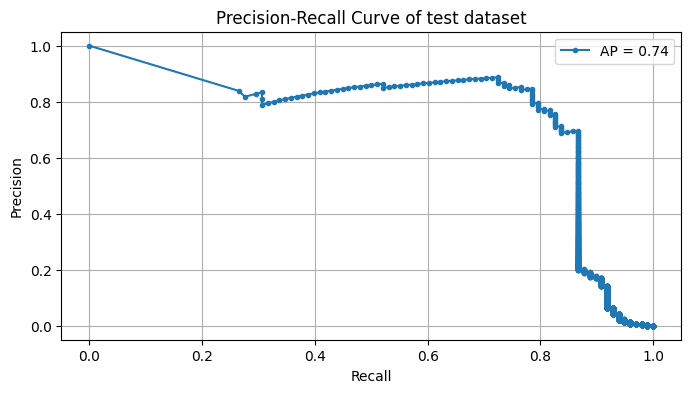

In [26]:
prep =  importlib.reload(prep)

test_scores_os = lin_model.predict_proba(x_test_scaled)[:, 1]
prep.accuracy_recall(test_scores_os, y_test)

Best threshold (F1): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.78      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



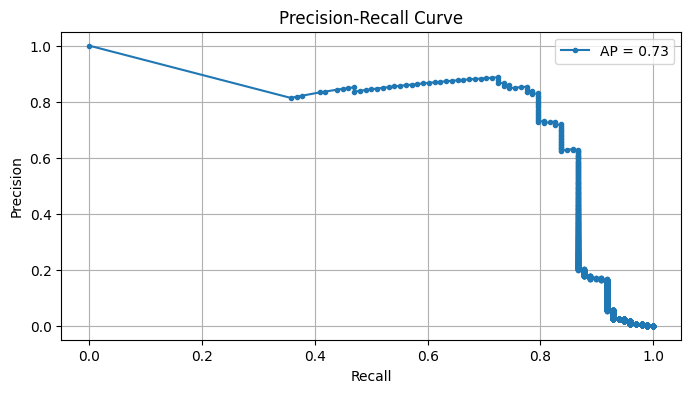

In [61]:
# Imbalance handling option: class weights + threshold tuning
from sklearn.metrics import precision_recall_curve, classification_report

balanced_model = LogisticRegression(class_weight="balanced", max_iter=1000)
balanced_model.fit(x_train_scaled, y_train)

bal_scores = balanced_model.predict_proba(x_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, bal_scores)
f1_scores = 2 * precision * recall / (precision + recall + 1e-12)
best_idx = int(f1_scores.argmax())

best_threshold = thresholds[best_idx - 1] if best_idx > 0 else 0.5
bal_pred = (bal_scores >= best_threshold).astype(int)

print(f"Best threshold (F1): {best_threshold:.4f}")
print(classification_report(y_test, bal_pred))

prep.accuracy_recall(bal_scores, y_test)

In [70]:
print(x_train_scaled.shape, x_test_scaled.shape)
print(len(bal_scores))
print(type(x_test_scaled))

(227845, 30) (56962, 30)
56962
<class 'numpy.ndarray'>


In [27]:
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=[f'feature_{i + 1}' for i in range(x_test_scaled.shape[1])])
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=[f'feature_{i + 1}' for i in range(x_train_scaled.shape[1])])
display(x_train_scaled_df.tail(4))

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
227841,1.352067,-0.396713,0.087171,-0.753679,-0.875555,1.397573,2.926905,-0.375714,1.145009,0.364206,...,-0.382572,0.050316,-0.025313,0.385353,1.128158,-3.131939,-1.597598,0.164348,0.414822,0.002942
227842,-0.315815,-0.075332,0.599620,1.007243,0.344127,0.251006,-0.609354,0.864946,-0.332256,-0.448511,...,0.008730,0.071571,0.489865,-0.464633,0.665736,0.456841,-0.825540,-0.301397,-0.595716,-0.331621
227843,-0.144489,-1.506155,1.421728,-1.664055,-2.682097,1.344205,2.040924,-0.380267,1.865931,0.527755,...,0.538728,-0.454501,-1.442555,0.228274,1.121632,0.614626,0.884045,1.236734,1.017553,-0.343153
227844,-0.387707,0.629238,-0.473540,0.255988,-0.492355,-0.745868,-0.476073,-0.404876,-0.157890,-0.683885,...,0.435809,0.037426,-0.321665,-0.095229,-0.179796,0.558309,-0.814362,0.003107,0.116232,0.096183


In [29]:
lin_model.fit(x_train_scaled_df, y_train)

pred = lin_model.predict(x_train_scaled_df)
pred_test = lin_model.predict(x_test_scaled_df)

In [90]:
print(classification_report(y_train, pred))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.62      0.73       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.86    227845
weighted avg       1.00      1.00      1.00    227845

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



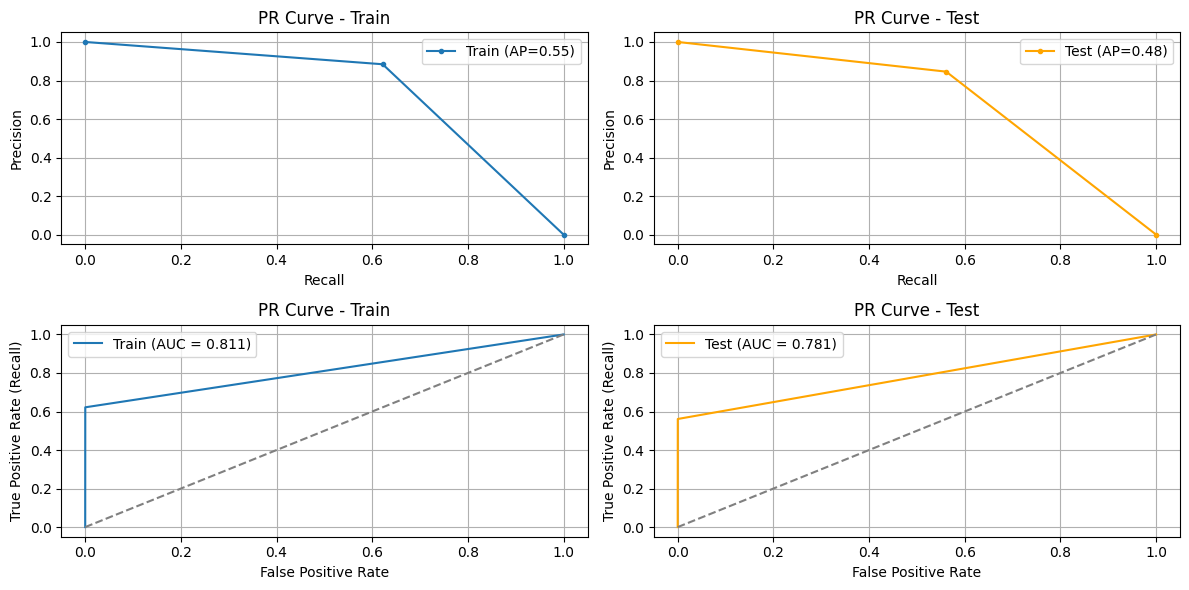

In [41]:
prep = importlib.reload(prep)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

#precision recall curve
prep.accuracy_recall_on_ax(pred, y_train, axes[0, 0], label="Train", title="PR Curve - Train", selector="PR")
prep.accuracy_recall_on_ax(pred_test, y_test, axes[0, 1], label="Test", title="PR Curve - Test", color = "orange", selector="PR")

prep.accuracy_recall_on_ax(pred, y_train, axes[1, 0], label="Train", title="PR Curve - Train", selector="ROC")
prep.accuracy_recall_on_ax(pred_test, y_test, axes[1, 1], label="Test", title="PR Curve - Test", color = "orange", selector="ROC")

plt.tight_layout()
plt.show()

In [35]:
#using the tree models
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_scaled, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [44]:
DT_tree_pred = DT_model.predict(x_train_scaled)
DT_tree_prediction = DT_model.predict(x_test_scaled)

print(classification_report(DT_tree_pred, y_train))
print(classification_report(DT_tree_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.79      0.72      0.75       107

    accuracy                           1.00     56962
   macro avg       0.89      0.86      0.88     56962
weighted avg       1.00      1.00      1.00     56962



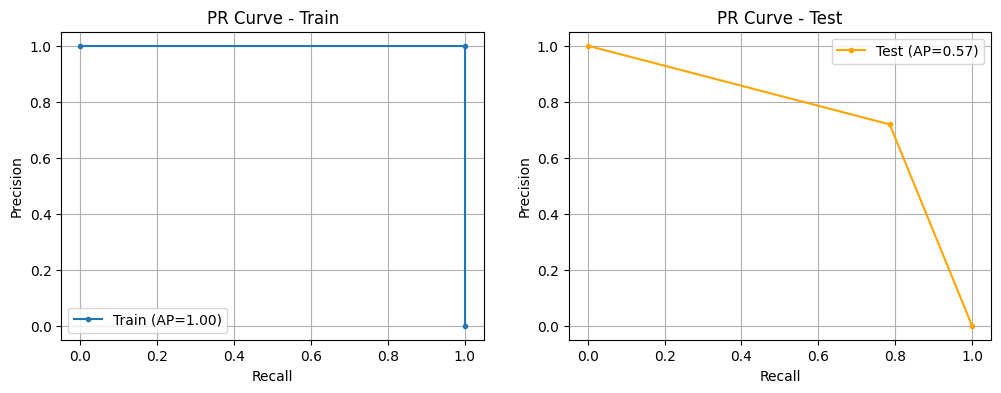

In [45]:
prep = importlib.reload(prep)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
prep.accuracy_recall_on_ax(DT_tree_pred, y_train, axes[0], label="Train", title="PR Curve - Train", selector="PR")
prep.accuracy_recall_on_ax(DT_tree_prediction, y_test, axes[1], label="Test", title="PR Curve - Test", color = "orange", selector="PR")